<a href="https://colab.research.google.com/github/ErikFantomex/MPI_Curso/blob/master/Lectura2_Comunicaci%C3%B3n_colectiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPI_Bcast


---



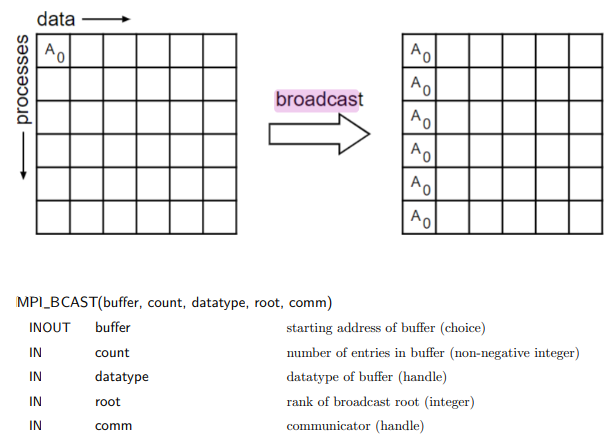

**En C/C++**, la definición queda como sigue 
```
int MPI_Bcast(void *buffer, int count, MPI_Datatype datatype, int root, MPI_Comm comm)
```


**En Python** \\
```
data=comm.bcast(datos, root)
```




##Con un valor

###C

In [ ]:
%%writefile broadcast.c
#include "mpi.h" 
#include<stdio.h> // printf
int main( ){   
  MPI_Init( NULL , NULL ); 
  int id, np, root; 
  float x; 
   double t1, t2;

  MPI_Comm_rank(MPI_COMM_WORLD, &id); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);   

  root = np-1;

  if( id == root ) x = 3.146; 

  printf("ANTES del Bcast--> [%d] x = %f \n",id, x);  
    t1 = MPI_Wtime();
  MPI_Bcast(&x, 1, MPI_FLOAT, root, MPI_COMM_WORLD); 
    t2 = MPI_Wtime();
  printf("DESPUÉS del Bcast--> [%d] x = %f \n",id, x);

   if(id==0)
    printf( "MPI_Wtime measured a 3 second sleep to be: %f segundos ",t2 - t1 );

  MPI_Finalize(); 
} 

Overwriting broadcast.c


In [ ]:
%%script bash
mpicc broadcast.c -o bcast
mpirun --allow-run-as-root -np 3 bcast

ANTES del Bcast--> [1] x = -142906040895312358310674432.000000 
ANTES del Bcast--> [0] x = -0.000000 
ANTES del Bcast--> [2] x = 3.146000 
DESPUÉS del Bcast--> [2] x = 3.146000 
DESPUÉS del Bcast--> [0] x = 3.146000 
DESPUÉS del Bcast--> [1] x = 3.146000 
MPI_Wtime measured a 3 second sleep to be: 0.000200 segundos 

###C++


In [ ]:
%%writefile broadcast.cpp
#include "mpi.h" 
#include <iostream>
#include <unistd.h>
#include <iomanip>

using namespace std;

int main( ){   
  MPI_Init( NULL , NULL ); 
  int id, np, root; 
  float x; 
  double t1, t2;

  MPI_Comm_rank(MPI_COMM_WORLD, &id); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);   

  root = np-1;

  if( id == root )
    x = 3.146; 

  cout <<"ANTES del Bcast--> [" << fixed << id << "] x = " << x << endl; 
  
  t1 = MPI_Wtime();
  MPI_Bcast(&x, 1, MPI_FLOAT, root, MPI_COMM_WORLD); 
  cout << "DESPUÉS del Bcast--> [" << id << "] x = " << x << endl;
  t2 = MPI_Wtime();
  
  if(id==0)
    cout << "MPI_Wtime measured a 3 second sleep to be: " << fixed << setprecision(10) << t2 - t1 << " segundos \n";

  MPI_Finalize(); 
} 

Writing broadcast.cpp


In [ ]:
%%script bash
mpicxx  broadcast.cpp -o bcast
mpirun --allow-run-as-root -np 3 bcast

#### Gráfica de tiempos

Text(0.5, 1.0, 'Comunicación')

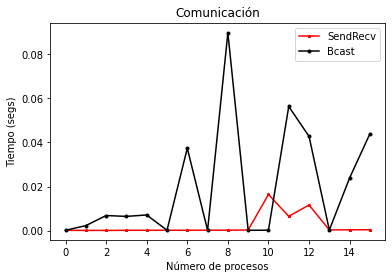

In [ ]:
plt.plot( range(16), datos_sendrecv, color='r', marker='*', markersize=3, label="SendRecv" )
plt.plot( range(16), datos_bcast, color='k', marker='o', markersize=3, label="Bcast" )
plt.xlabel("Número de procesos")
plt.ylabel("Tiempo (segs)")
plt.legend()
plt.title("Comunicación")

##Con más de un valor

###C

In [ ]:
%%writefile broadcast_3datos.c
#include "mpi.h" 
#include<stdio.h> // printf
#include<stdlib.h> // malloc 
int main( ){   
  MPI_Init( NULL , NULL ); 
  int id, i, np, root, SIZE=3; 
  float *sendbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &id); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);   

  root = np-1;

  sendbuf = (float*) malloc (SIZE*sizeof(float)); 
  if(sendbuf==NULL){ 
      printf("ERROR: Memoria insuficiente [%d]",id); 
      MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  if(id==root)
    for( i = 0 ; i < SIZE ; i++ ) 
      sendbuf[i] = (i+1)/1.0; 

  MPI_Bcast(sendbuf, SIZE, MPI_FLOAT, root, MPI_COMM_WORLD); 

  if(id==0){ // imprime uno diferente al root, para verificar
    printf("[%d] DESPUÉS del Bcast-->\n",id);  
    for(i=0;i<SIZE;i++)
      printf(" %f, ", sendbuf[i]);  
  }

  free(sendbuf);
  MPI_Finalize(); 
} 

Writing broadcast_3datos.c


In [ ]:
%%script bash
mpicc broadcast_3datos.c -o broadcast_3datos
mpirun --allow-run-as-root -np 3 broadcast_3datos

[0] DESPUÉS del Bcast-->
 1.000000,  2.000000,  3.000000, 

###C++

In [ ]:
%%writefile broadcast_3datos.cpp
#include "mpi.h" 
#include<iostream> 
#include<cstdlib>  

using namespace std;

int main( ){   
  MPI_Init( NULL , NULL ); 
  int id, i, np, root, SIZE=3; 
  float *sendbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &id); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);   

  root = np-1;

  sendbuf = new float[SIZE]; 
  if(sendbuf==NULL){ 
      cout <<"ERROR: Memoria insuficiente [" << id << "]" << endl; 
      MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  if(id==root)
    for( i = 0 ; i < SIZE ; i++ ) 
      sendbuf[i] = i/1.0; 

  MPI_Bcast(sendbuf, SIZE, MPI_FLOAT, root, MPI_COMM_WORLD); 

  if(id==0){ // imprime uno diferente al root, para verificar
    cout << "[" << id << "] DESPUÉS del Bcast-->\n";  
    for(i=0;i<SIZE;i++)
      cout << sendbuf[i] << ", ";  
  }

  delete[] sendbuf;
  MPI_Finalize(); 
} 

Writing broadcast_3datos.cpp


In [ ]:
%%script bash
mpicxx  broadcast_3datos.cpp -o broadcast_3datos
mpirun --allow-run-as-root -np 3 broadcast_3datos

[0] DESPUÉS del Bcast-->
0, 1, 2, 

#MPI_Reduce
---
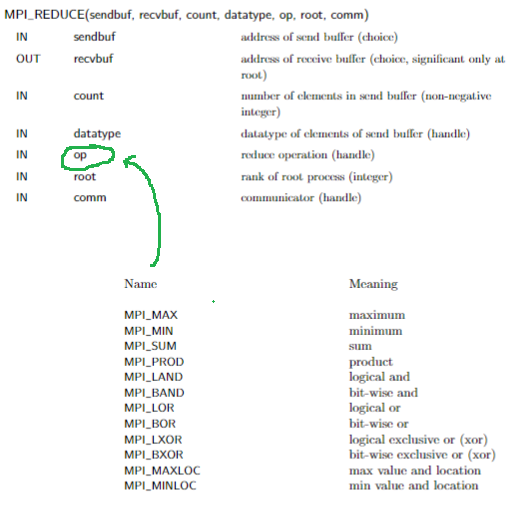



En C/C++, \\
```
int MPI_Reduce(const void *sendbuf, void *recvbuf, int count, MPI_Dataype datatype, MPI_op op, int root, MPI_Comm comm)
```

En Python, \\
```
recvbuf = comm.reduce(sendbuf, root, op)
```


## con un valor

###C

In [ ]:
%%writefile reduce.c
#include "mpi.h" 
#include<stdio.h>  // printf
#include<stdlib.h> // malloc  
int main(  ){   
  MPI_Init(NULL,NULL); 
  int rank, root; 
  float sendbuf; 
  float recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

  root = 0;    
  sendbuf = rank; 

  MPI_Reduce(&sendbuf, &recvbuf, 1, MPI_FLOAT, MPI_SUM, root, MPI_COMM_WORLD); 

  //if(rank==root) 
    printf("\n[%d], reducción = %.1f \n",rank,recvbuf);  

  MPI_Finalize(); 
  return 0; 
} 

Overwriting reduce.c


In [ ]:
%%script bash
mpicc reduce.c -o bcast
mpirun --allow-run-as-root -np 3 bcast


[1], reducción = -0.0 

[2], reducción = -0.0 

[0], reducción = 3.0 


###C++

In [ ]:
%%writefile reduce.cpp
#include "mpi.h" 
#include<iostream> 
#include<cstdlib> 


int main(  ){   
  MPI_Init(NULL,NULL); 
  int rank, root; 
  float sendbuf; 
  float recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

  root = 0;    
  sendbuf = rank; 

  MPI_Reduce(&sendbuf, &recvbuf, 1, MPI_FLOAT, MPI_SUM, root, MPI_COMM_WORLD); 

  if(rank==root) 
    std::cout <<"\n[" << root <<"], reducción = " << recvbuf;  

  MPI_Finalize(); 
  return 0; 
} 

In [ ]:
%%script bash
mpicxx  reduce.cpp -o reduce
mpirun --allow-run-as-root -np 5 reduce


[0], reducción = 10

## con más de un valor

###C

In [ ]:
%%writefile reduce_SIZEdatos.c
#include "mpi.h" 
#include<stdio.h>  // printf
#include<stdlib.h> // malloc  
int main(  ){   
   MPI_Init(NULL,NULL); 
   int rank, root, SIZE=3, i; 
   float *sendbuf; 
   float *recvbuf; 

   MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

   root = 0;    
  
  sendbuf = (float*) malloc (SIZE*sizeof(float));
  if(sendbuf==NULL){ 
    printf("ERROR: Memoria insuficiente [%d]",rank); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  for( i = 0 ; i < SIZE ; i++ ) 
    sendbuf[i] = i*rank/1.0; 
  
  if(rank==root){
    recvbuf = (float*) malloc (SIZE*sizeof(float));
    if(recvbuf==NULL){ 
      printf("ERROR: Memoria insuficiente [%d]",rank); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
  }

  MPI_Reduce(sendbuf, recvbuf, SIZE, MPI_FLOAT, MPI_SUM, root, MPI_COMM_WORLD); 

  if(rank==root)
    for( i = 0 ; i < SIZE ; i++ ) 
      printf("\nreducción[%d] = %.1f ",i,recvbuf[i]);  

  // liberar memoria solicitada
  if(rank==root) free(recvbuf);
  free(sendbuf);

  MPI_Finalize(); 
  return 0; 
} 

Writing reduce_SIZEdatos.c


In [ ]:
%%script bash
mpicc reduce_SIZEdatos.c -o reduce_SIZEdatos
mpirun --allow-run-as-root -np 3 reduce_SIZEdatos


reducción[0] = 0.0 
reducción[1] = 3.0 
reducción[2] = 6.0 

###C++

In [ ]:
%%writefile reduce_SIZEdatos.cpp
#include "mpi.h" 
#include<iostream> 
#include<cstdlib>

using namespace std;

int main(  ){   
   MPI_Init(NULL,NULL); 
   int rank, root, SIZE=3, i; 
   float *sendbuf; 
   float *recvbuf; 

   MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

   root = 0;    
  
  sendbuf =  new float[SIZE];
  if(sendbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente [" << rank << "]" << endl; 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  for( i = 0 ; i < SIZE ; i++ ) 
    sendbuf[i] = i*rank/1.0; 
  
  if(rank==root){
    recvbuf = new float[SIZE];
    if(recvbuf==NULL){ 
      cout << "ERROR: Memoria insuficiente [" << rank << "]" << endl; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
  }

  MPI_Reduce(sendbuf, recvbuf, SIZE, MPI_FLOAT, MPI_SUM, root, MPI_COMM_WORLD); 

  if(rank==root)
    for( i = 0 ; i < SIZE ; i++ ) 
      cout << "\nreducción[" << i << "] = " << recvbuf[i];  

  // liberar memoria solicitada
  if(rank==root) delete[] recvbuf;
  delete[] sendbuf;

  MPI_Finalize(); 
  return 0; 
} 

Writing reduce_SIZEdatos.cpp


In [ ]:
%%script bash
mpicxx reduce_SIZEdatos.cpp -o reduce_SIZEdatos
mpirun --allow-run-as-root -np 3 reduce_SIZEdatos


reducción[0] = 0
reducción[1] = 3
reducción[2] = 6

In [ ]:
%%writefile reduce_SIZEdatos.py
from mpi4py import MPI
import numpy as np

SIZE = 3

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

root = 0
sendbuf = np.zeros(SIZE)
for i in range(SIZE):
  sendbuf[i]= i*rank/1.0

if rank == root:
  recvbuf = np.zeros(SIZE)
else:
  recvbuf = None

comm.Reduce(
    sendbuf,
    recvbuf,
    op = MPI.SUM,
    root = root
)

if (rank == root):
  for i in range(SIZE):
    print(f"\nreducción[{i}] = {recvbuf[i]}")



Overwriting reduce_SIZEdatos.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 3 python reduce_SIZEdatos.py



---
---



# MPI_Allreduce

No hay un proceso root, todos se quedan con una copia del resultado de la operación.

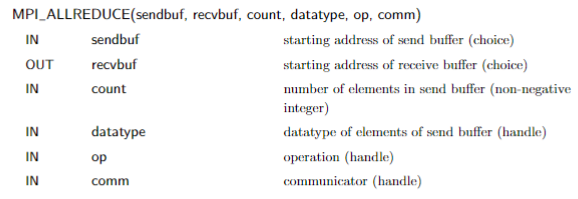

##Con un dato

###C

In [ ]:
%%writefile allreduce.c
#include "mpi.h" 
#include<stdio.h>  // printf
#include<stdlib.h> // malloc  
int main(  ){   
  MPI_Init(NULL,NULL); 
  int rank;
  float sendbuf; 
  float recvbuf=0; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
    
  sendbuf = rank; 

  MPI_Allreduce(&sendbuf, &recvbuf, 1, MPI_FLOAT, MPI_SUM, MPI_COMM_WORLD); 

  printf("\n[%d], reducción = %.1f\n",rank,recvbuf);  

  MPI_Finalize(); 
  return 0; 
} 

Overwriting allreduce.c


In [ ]:
%%script bash
mpicc allreduce.c -o allreduce
mpirun --allow-run-as-root -np 5 allreduce



[4], reducción = 10.0

[1], reducción = 10.0

[3], reducción = 10.0
[2], reducción = 10.0

[0], reducción = 10.0


###C++

In [ ]:
%%writefile allreduce.cpp
#include "mpi.h" 
#include <iostream>
#include <cstdlib>
#include <iomanip>

using namespace std;

int main(  ){   
  MPI_Init(NULL,NULL); 
  int rank, root; 
  float sendbuf; 
  float recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 

  root = 0;    
  sendbuf = rank; 

  MPI_Allreduce(&sendbuf, &recvbuf, 1, MPI_FLOAT, MPI_SUM, MPI_COMM_WORLD); 

  cout << "\n[" << rank << "], reducción = " << fixed << setprecision(1) << recvbuf << endl;  

  MPI_Finalize(); 
  return 0; 
}

Overwriting allreduce.cpp


In [ ]:
%%script bash
mpicxx allreduce.cpp -o allreduce
mpirun --allow-run-as-root -np 5 allreduce




[4], reducción = 10.0
[3], reducción = 10.0

[1], reducción = 10.0
[0], reducción = 10.0

[2], reducción = 10.0


##Con mas de un dato

###C

In [ ]:
%%writefile allreduce_SIZE.c
#include "mpi.h" 
#include<stdio.h>  // printf
#include<stdlib.h> // malloc  
int main(  ){   
  int id, np, i, SIZE=3; 
  float *sendbuf; 
  float *recvbuf; 

  MPI_Init(NULL,NULL);
  MPI_Comm_rank(MPI_COMM_WORLD, &id); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  sendbuf = (float*) malloc (SIZE*sizeof(float));
  if(sendbuf==NULL){ 
    printf("ERROR: Memoria insuficiente [%d]",id); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  }  

  for( i = 0 ; i < SIZE ; i++ ) 
    sendbuf[i] = i*id/1.0;  

  recvbuf = (float*) malloc (SIZE*sizeof(float));
  if(recvbuf==NULL){ 
    printf("ERROR: Memoria insuficiente [%d]",id); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 
 
  MPI_Allreduce(sendbuf, recvbuf, SIZE, MPI_FLOAT, MPI_SUM, MPI_COMM_WORLD); 

  if(id==3){ // imprime uno
    printf("[%d] DESPUÉS del AllReduce-->\n",id);  
    for(i=0;i<SIZE;i++)
      printf(" %f, ", recvbuf[i]);  
  }

  free(recvbuf);
  free(sendbuf);
  
  MPI_Finalize(); 
  return 0; 
} 

Writing allreduce_SIZE.c


In [ ]:
%%script bash
mpicc allreduce_SIZE.c -o allreduce_SIZE
mpirun --allow-run-as-root -np 5 allreduce_SIZE

[3] DESPUÉS del AllReduce-->
 0.000000,  10.000000,  20.000000, 

###C++

In [ ]:
%%writefile allreduce_SIZE.cpp
#include "mpi.h" 
#include<iostream>
#include<cstdlib>
using namespace std;  
int main(  ){   
  int id, np, root, i, SIZE=3; 
  float *sendbuf; 
  float *recvbuf; 

  MPI_Init(NULL,NULL);
  MPI_Comm_rank(MPI_COMM_WORLD, &id); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  root = np-1;  

  sendbuf = new float[SIZE];
  if(sendbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente [" << id << "]" << endl;  
    MPI_Abort(MPI_COMM_WORLD,99); 
  }  

  for( i = 0 ; i < SIZE ; i++ ) 
    sendbuf[i] = i*id/1.0;  

  recvbuf = new float[SIZE];
  if(recvbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente [" << id << "]" << endl;  
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 
 
  MPI_Allreduce(sendbuf, recvbuf, SIZE, MPI_FLOAT, MPI_SUM, MPI_COMM_WORLD); 

  if(id==1){ // imprime uno
    cout << "[" << id << "] DESPUÉS del AllReduce-->\n";  
    for(i=0;i<SIZE;i++)
      cout << " "<< recvbuf[i] << ", ";  
  }

  delete[] recvbuf;
  delete[] sendbuf;
  
  MPI_Finalize(); 
  return 0; 
} 

Writing allreduce_SIZE.cpp


In [ ]:
%%script bash
mpicxx allreduce_SIZE.cpp -o allreduce_SIZE
mpirun --allow-run-as-root -np 5 allreduce_SIZE

[1] DESPUÉS del AllReduce-->
 0,  10,  20, 



---


#Ejercicios:


1. Evaluación del circuito
2. Contar el número de primos en el rango [1,n] (usar MPI_Reduce)
3. Encontrar y contar los primos gemelos en [1,n]. Todos los procesos deberán conocer el resultado.
    
    Dos números primos se denominan gemelos si uno de ellos es igual al otro más dos unidades, por ejemplo, 3 y 5 o  11 y 13

4. Encontrar el gap máximo entre primos en [1,n]
5. Aproximar el área bajo la curva de una función en [0,1]


---



#Ordenamiento secuencial con los datos de un archivo

1.   Generador del archivo datos.dat
2.   Ordenamiento de los datos en datos.dat (usar quicksort) <--- Ejercicio

In [ ]:
%%writefile generador_archivo_datos.c
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
// ---> argv[1]: Nombre del archivo a generar <---
// ---> argv[2]: numero de datos a generar    <---
int main(int argc, char*argv[]){
    FILE *fp;
    int n,*datos, i;
  
    n = atoi(argv[2]);
    fp = fopen(argv[1], "w");
    if(fp){
        // generador de n numeros aleatorios para guardarlos en el archivo indicado
        srand(time(NULL));
        fprintf(fp,"%d\n",n);
        for(i=0;i<n;i++)
            fprintf(fp,"%d\n",rand()%100);
    
        fclose(fp);
    }
  
    return 0;
}

Overwriting generador_archivo_datos.c


In [ ]:
%%script bash
gcc generador_archivo_datos.c -o generar
./generar datos.dat 10

[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)



---



---



---



# [EJEMPLO completo](https://colab.research.google.com/drive/1UPkRFcEWg9K_NDRWmCV_3cH-adRALK06?usp=sharing) con toma de tiempo y gráficas

[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)



---



---



---



#MPI_Scatter
Se hace una distribución de los datos en **sendbuf** del **root**, enviando **sendcount** elementos a cada proceso (incluido el root) que son recibidos en **recvbuf**.


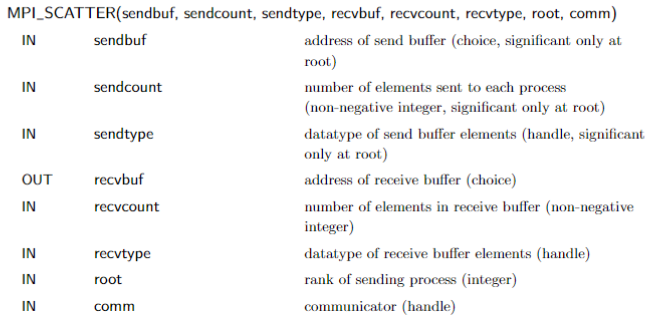

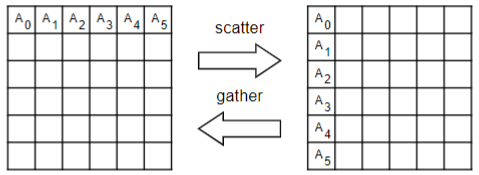

##C

In [ ]:
%%writefile scatter.c
#include "mpi.h" 
#include<stdio.h> 
#include<stdlib.h> 
#define SIZE 4 

int main(  ){  
  MPI_Init(NULL,NULL); 
  int np, i, rank, root; 
  float *sendbuf; 
  float recvbuf[SIZE];  

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);     

  root = np-1;  
   
  if( rank == root ){  
    sendbuf = (float*) malloc (SIZE*np*sizeof(float)); 
    printf("\n[%d] sendbuf={",rank);
    for( i = 0 ; i < SIZE*np ; i++ ){
      sendbuf[i] = i/1.0; 
      printf("%.0f, ", sendbuf[i]);
    }
    printf("}\n");
  } 

  MPI_Scatter(sendbuf, SIZE, MPI_FLOAT, recvbuf, SIZE, MPI_FLOAT, root, MPI_COMM_WORLD);     

  //printf("\n[%d]",rank);
  //for(i=0;i<SIZE;i++)
  //  printf("%5.1f, ",recvbuf[i]); 
  printf("[%d] recvbuf={%.0f, %.0f, %.0f, %.0f}\n",rank, recvbuf[0], recvbuf[1],recvbuf[2],recvbuf[3]);

  if( rank == root ) 
    free( sendbuf ); 

  MPI_Finalize(); 
  return 0;
} 

Writing scatter.c


In [ ]:
%%script bash
mpicc scatter.c -o scatter1
mpirun --allow-run-as-root -np 5 scatter1


[4] sendbuf={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, }
[4] recvbuf={16, 17, 18, 19}
[0] recvbuf={0, 1, 2, 3}
[2] recvbuf={8, 9, 10, 11}
[1] recvbuf={4, 5, 6, 7}
[3] recvbuf={12, 13, 14, 15}


##C++

In [ ]:
%%writefile scatter.cpp
#include "mpi.h" 
#include<iostream>
#include<cstdlib> 
#define SIZE 4 

int main(  ){  
  MPI_Init(NULL,NULL); 
  int np, i,j, rank, root; 
  float *sendbuf; 
  float recvbuf[SIZE];  

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);     

  root = np-1;  
 
  if( rank == root ){  
    sendbuf = new float[SIZE*np]; 
    for( i = 0 ; i < SIZE*np ; i++ ) 
      sendbuf[i] = i/1.0; 
  } 

  MPI_Scatter(sendbuf, SIZE, MPI_FLOAT, recvbuf, SIZE, MPI_FLOAT, root, MPI_COMM_WORLD);     
 
  //std::cout <<"[" << rank << "] " << recvbuf[0] << ", " << recvbuf[1] << ", " <<recvbuf[2] << ", " << recvbuf[3] << "\n";
  printf("[%d] After scatter --> ",rank);
  for(i=0;i<np;i++){
    if( rank == i ){      
      //printf("\n");
      for(j=0;j<SIZE;j++)
        printf("%.1f, ",recvbuf[j]);
      printf("\n");
    }
    MPI_Barrier(MPI_COMM_WORLD);
  } 

  if( rank == root ) 
    delete[] sendbuf; 

  MPI_Finalize(); 
  return 0;
} 

Overwriting scatter.cpp


In [ ]:
%%script bash
mpicxx scatter.cpp -o scatter
mpirun --allow-run-as-root -np 5 scatter

[0] After scatter -->0.0, 1.0, 2.0, 3.0, 
[1] After scatter -->4.0, 5.0, 6.0, 7.0, 
[2] After scatter -->8.0, 9.0, 10.0, 11.0, 
[3] After scatter -->12.0, 13.0, 14.0, 15.0, 
[4] After scatter -->16.0, 17.0, 18.0, 19.0, 


##Python

In [ ]:
!pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 27.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185277 sha256=d3be0602b1d698fe3a5027677c3bec84aa76d881c64e736c2d6fb2fa3262708b
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


In [ ]:
%%writefile scatter1.py
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank( )
numDatos = 4
numprocesses   = comm.Get_size()

if comm.rank == numprocesses-1:
  sendbuf = np.empty(numprocesses*numDatos, dtype=np.float64)
  for i in range(numprocesses*numDatos):
    sendbuf[i] = i
  print("Arreglo completo ---> ", sendbuf )
else:
  sendbuf = None
  
recvbuf = np.empty(numDatos, dtype=np.float64)

comm.Scatter([sendbuf, MPI.FLOAT], [recvbuf, MPI.FLOAT],root=numprocesses-1)
#comm.Scatter( sendbuf, recvbuf, root = 0 )
print("[",rank,"] ",recvbuf)

Overwriting scatter1.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python scatter1.py

Arreglo completo --->  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
[ 4 ]  [16. 17. 18. 19.]
[ 2 ]  [ 8.  9. 10. 11.]
[ 0 ]  [0. 1. 2. 3.]
[ 1 ]  [4. 5. 6. 7.]
[ 3 ]  [12. 13. 14. 15.]


In [ ]:
%%writefile scatter2.py <== REVISAR
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank( )
numprocesses   = comm.Get_size( )

SIZE = 4 
if rank == numprocesses-1:
  sendbuf = [i for i in range(numprocesses)]
else:
  sendbuf = None 

recvbuf = comm.scatter([sendbuf, MPI.FLOAT], root=numprocesses-1)
print(recvbuf)

Overwriting scatter2.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python scatter2.py

Process is terminated.


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

#MPI_Scatterv

Se hace una distribución de los elementos en sendbuf entre los procesos en el comunicador. A cada proceso se le envia un valor diferente de datos (especificado en **sendcounts**).

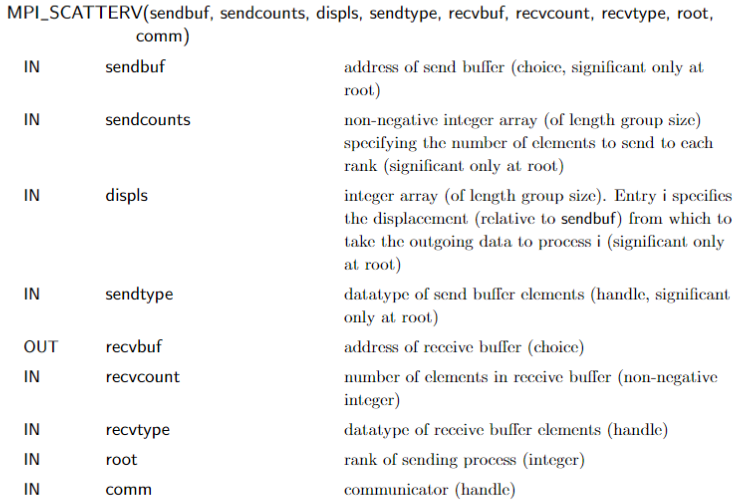

##C

In [ ]:
%%writefile scatterv.c
// DESCRIPCION: Ejemplo de uso de MPI_Scatterv  
#include "mpi.h" 
#include <stdio.h> 
#include<stdlib.h> 
int main(  ){   
  MPI_Init(NULL,NULL); 
  int np, rank, recvcount, root,i,ndatos; 
  float *sendbuf; 
  float *recvbuf; 
  int *displs; 
  int *sendcounts; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 
  root = np-1;   

  if(rank==root){  
    sendcounts = (int*)malloc(np*sizeof(int)); 
    if(sendcounts==NULL){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
    displs = (int*)malloc(np*sizeof(int)); 
    if(displs==NULL){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
      return 1; 
    } 

    sendcounts[0]=1; 
    displs[0]=0; 
    ndatos = sendcounts[0]; 
    for(i=1;i<np;i++){ 
      sendcounts[i]=2*i+1; 
      ndatos += sendcounts[i]; 
      displs[i]=displs[i-1]+sendcounts[i-1]; 
    }  

    sendbuf=(float*)malloc(ndatos*sizeof(float)); 
    if(sendbuf==NULL){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 

    for(i=0;i<ndatos;i++)
      sendbuf[i] = i/1.0;

    for(i=0;i<np;i++)
      printf("%d,",displs[i]);                 
  }        

  MPI_Scatter(sendcounts, 1, MPI_INT, &recvcount, 1, MPI_INT, root, MPI_COMM_WORLD); 

  printf("\nRecvcount:[%d] %d",rank,recvcount);        

  recvbuf=(float*)malloc(recvcount*sizeof(float)); 
  if(recvbuf==NULL){ 
    printf("ERROR: Memoria insuficiente"); 
    MPI_Abort(MPI_COMM_WORLD,99);  
  } 

  MPI_Scatterv(sendbuf, sendcounts, displs, MPI_FLOAT, recvbuf, recvcount, MPI_FLOAT, root , MPI_COMM_WORLD);          

  
    printf("\nrecvbuf[%d]",rank); 
    for(i=0;i<recvcount;i++)
      printf("%4.1f,",recvbuf[i]);     
    printf("\n");

  if(rank==root){ 
    free(sendbuf); 
    free(displs); 
    free(sendcounts); 
  } 
  
  free(recvbuf);  

  MPI_Finalize(); 
  return 0; 
} 

Writing scatterv.c


In [ ]:
%%script bash
mpicc scatterv.c -o scatterv1
mpirun --allow-run-as-root -np 3 scatterv1

0,1,4,
Recvcount:[2] 5
recvbuf[2] 4.0, 5.0, 6.0, 7.0, 8.0,


Recvcount:[1] 3
recvbuf[1] 1.0, 2.0, 3.0,
Recvcount:[0] 1
recvbuf[0] 0.0,


##C++

In [ ]:
%%writefile scatterv.cpp
// DESCRIPCION: Ejemplo de uso de MPI_Scatterv  
#include "mpi.h" 
#include <iostream> 
#include<cstdlib>
using namespace std; 
int main(  ){   
  MPI_Init(NULL,NULL); 
  int np, rank, recvcount, root,i,ndatos; 
  float *sendbuf; 
  float *recvbuf; 
  int *displs; 
  int *sendcounts; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 
  root = np-1;   

  if(rank==root){  
    sendcounts = new int[np]; 
    if(sendcounts==NULL){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
    displs = (int*)malloc(np*sizeof(int)); 
    if(displs==NULL){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
      return 1; 
    } 

    sendcounts[0]=1; 
    displs[0]=0; 
    ndatos = sendcounts[0]; 
    for(i=1;i<np;i++){ 
      sendcounts[i]=2*i+1; 
      ndatos += sendcounts[i]; 
      displs[i]=displs[i-1]+sendcounts[i-1]; 
    }  

    sendbuf= new float[ndatos]; 
    if(sendbuf==NULL){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 

    for(i=0;i<ndatos;i++)
      sendbuf[i] = i/1.0;             
  }        

  MPI_Scatter(sendcounts, 1, MPI_INT, &recvcount, 1, MPI_INT, root, MPI_COMM_WORLD); 

  //cout << "\n[" << rank << "] " << recvcount << endl;        

  recvbuf = new float[recvcount]; 
  if(recvbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente"; 
    MPI_Abort(MPI_COMM_WORLD,99);  
  } 

  MPI_Scatterv(sendbuf, sendcounts, displs, MPI_FLOAT, recvbuf, recvcount, MPI_FLOAT, root , MPI_COMM_WORLD);          

  if(rank==2){
    cout << "\n[" << rank << "]"; 
    for(i=0;i<recvcount;i++)
      cout << "\n" << recvbuf[i] << ",";     
  }

  if(rank==root){ 
    delete[] sendbuf; 
    delete[] displs; 
    delete[] sendcounts; 
  } 
  
  delete[] recvbuf;  

  MPI_Finalize(); 
  return 0; 
} 

Overwriting scatterv.cpp


In [ ]:
%%script bash
mpicxx scatterv.cpp -o bcast
mpirun --allow-run-as-root -np 5 bcast


[2]
4,
5,
6,
7,
8,

#MPI_Gather
Realiza una recolección de datos desde cada uno de los procesos en el comunicador. 

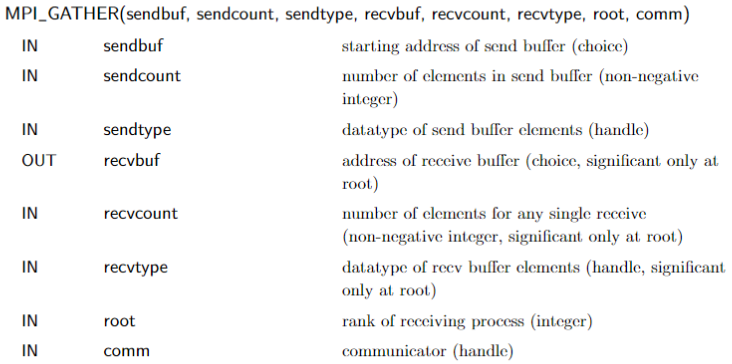


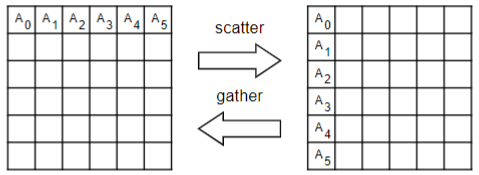

##C

In [ ]:
%%writefile gather.c
// DESCRIPCION: Ejemplo de uso de MPI_Gather 
//              El proceso ROOT recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo 
#include "mpi.h" 
#include<stdio.h>  
#include<stdlib.h> // malloc 
#define SIZE 4 
int main(  ){  
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, recvcount, root,i; 
  float sendbuf[SIZE]; 
  float *recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  if(np>=3){ // DEBE CUMPLIRSE QUE SE USEN AL MENOS 3 PROCESOS 
    root = 2;  
    sendcount = SIZE;  
    recvcount = SIZE; 

    for(i=0;i<SIZE;i++) 
      sendbuf[i]= rank; 

    if(rank==root){ 
      recvbuf=(float*)malloc(SIZE*np*sizeof(float)); 
      if(recvbuf==NULL){ 
        printf("ERROR: Memoria insuficiente"); 
        MPI_Abort(MPI_COMM_WORLD,99); 
      } 
    }   

    MPI_Gather(sendbuf,sendcount,MPI_FLOAT,recvbuf,recvcount, MPI_FLOAT, root ,MPI_COMM_WORLD); 

    if(rank==root){  
      printf("\nSoy el %d, recolecte los valores: ",root); 
      for(i=0;i<SIZE*np;i++){ 
        if(i%SIZE==0) printf("\n"); 
        printf("%5.1f, ",recvbuf[i]); 
      }       
      free(recvbuf); 
    } 
  }else 
    printf("Debe hacer al menos 3 procesos para que funciones este programa"); 

  MPI_Finalize(); 
  return 0; 
} 

Writing gather.c


In [ ]:
%%script bash
mpicc gather.c -o gather
mpirun --allow-run-as-root -np 5 gather


Soy el 2, recolecte los valores: 
  0.0,   0.0,   0.0,   0.0, 
  1.0,   1.0,   1.0,   1.0, 
  2.0,   2.0,   2.0,   2.0, 
  3.0,   3.0,   3.0,   3.0, 
  4.0,   4.0,   4.0,   4.0, 

##C++

In [ ]:
%%writefile gather.cpp
// DESCRIPCION: Ejemplo de uso de MPI_Gather 
//              El proceso ROOT recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo 
#include "mpi.h" 
#include<iostream>  
#include<cstdlib>  
#define SIZE 4 

using namespace std;

int main(  ){  
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, recvcount, root,i; 
  float sendbuf[SIZE]; 
  float *recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  if(np>=3){ // DEBE CUMPLIRSE QUE SE USEN AL MENOS 3 PROCESOS 
    root = 2;  
    sendcount = SIZE;  
    recvcount = SIZE; 

    for(i=0;i<SIZE;i++) 
      sendbuf[i]= rank; 

    if(rank==root){ 
      recvbuf= new float[SIZE*np]; 
      if(recvbuf==NULL){ 
        cout << "ERROR: Memoria insuficiente"; 
        MPI_Abort(MPI_COMM_WORLD,99); 
      } 
    }   

    MPI_Gather(sendbuf,sendcount,MPI_FLOAT,recvbuf,recvcount, MPI_FLOAT, root ,MPI_COMM_WORLD); 

    if(rank==root){  
      cout <<"\nSoy el " << root << ", recolecte los valores: "; 
      for(i=0;i<SIZE*np;i++){ 
        if(i%SIZE==0) cout << endl; 
        cout << recvbuf[i] << ", "; 
      }       
      delete[] recvbuf; 
    } 
  }else 
    cout << "Debe hacer al menos 3 procesos para que funciones este programa"; 

  MPI_Finalize(); 
  return 0; 
} 

Overwriting gather.cpp


In [ ]:
%%script bash
mpicxx gather.cpp -o gather
mpirun --allow-run-as-root -np 5 gather


Soy el 2, recolecte los valores: 
0, 0, 0, 0, 
1, 1, 1, 1, 
2, 2, 2, 2, 
3, 3, 3, 3, 
4, 4, 4, 4, 

#MPI_Gatherv

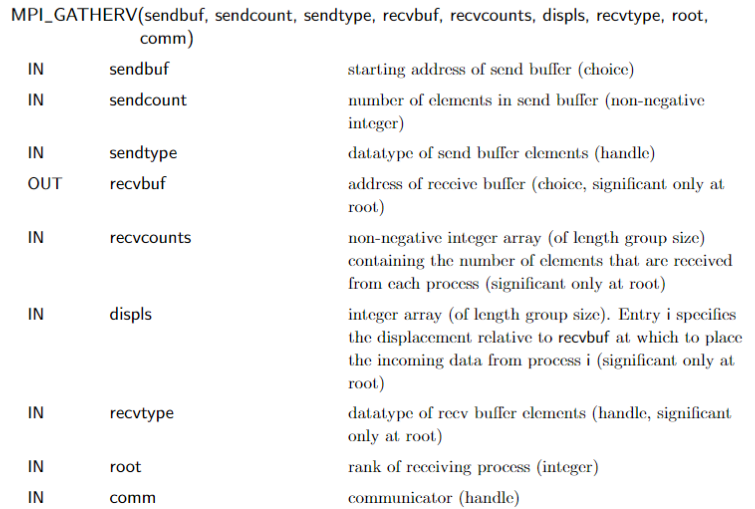

##C

In [ ]:
%%writefile gatherv.c
// DESCRIPCION: Ejemplo de uso de MPI_Gatherv 
//              El proceso root recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo (pueden tener longitud distinta) 
#include "mpi.h" 
#include<stdio.h>
#include<stdlib.h> // malloc 
int main(  ){   
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, root,i, ndatos; 
  float *sendbuf, *recvbuf; 
  int *recvcounts,*displs; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  root = np-1;  
  sendcount = rank + 1;  
  sendbuf = (float*)malloc(sendcount*sizeof(float)); 
  if( sendbuf == NULL ){ 
    printf("ERROR: Memoria insuficiente"); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  for(i=0;i<sendcount;i++) 
    sendbuf[i]= rank; 
  
  if(rank==root){ 
    ndatos=(int)(np*(np+1)/2); 
    recvbuf=(float*)malloc(ndatos*sizeof(float)); 
    if(recvbuf==NULL){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
    recvcounts = (int*)malloc(np*sizeof(int)); 
    if( recvcounts == NULL ){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
  }   

  MPI_Gather(&sendcount,1,MPI_INT,recvcounts,1, MPI_INT, root ,MPI_COMM_WORLD); 

  if(rank==root){  
    printf("Ejemplo de uso de MPI_Gatherv \n"); 
    printf("\n [%d] recolecte los valores: ",root); 
    for(i=0;i<np;i++)
      printf("%5d, ",recvcounts[i]);       
    printf("\n"); 
    
    displs = (int*)malloc(np*sizeof(int)); 
    if( displs == NULL ){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 

    displs[0]=0; 
    for(i=1;i<np;i++) 
      displs[i]=displs[i-1]+recvcounts[i-1]; 
  } 

  MPI_Gatherv(sendbuf, sendcount, MPI_FLOAT, recvbuf, recvcounts, displs, MPI_FLOAT, root, MPI_COMM_WORLD); 
  
  free(sendbuf); 

  if(rank==root){ 
    printf("Datos recolectados por el %d\n",root); 
    for(i=0;i<ndatos;i++) 
      printf("%4.0f, ",recvbuf[i]);       

    free(recvbuf); 
    free(recvcounts); 
    free(displs); 
  } 

  MPI_Finalize(); 
  return 0; 
} 

Writing gatherv.c


In [ ]:
%%script bash
mpicc gatherv.c -o gatherv1
mpirun --allow-run-as-root -np 5 gatherv1

Ejemplo de uso de MPI_Gatherv 

 [4] recolecte los valores:     1,     2,     3,     4,     5, 
Datos recolectados por el 4
   0,    1,    1,    2,    2,    2,    3,    3,    3,    3,    4,    4,    4,    4,    4, 

## C++

In [ ]:
%%writefile gatherv.cpp
// DESCRIPCION: Ejemplo de uso de MPI_Gatherv 
//              El proceso root recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo (pueden tener longitud distinta) 
#include "mpi.h" 
#include<iostream>
#include<cstdlib>
using namespace std; 
int main(  ){   
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, root,i, ndatos; 
  float *sendbuf, *recvbuf; 
  int *recvcounts,*displs; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  root = np-1;  
  sendcount = rank + 1;  
  sendbuf = new float[sendcount]; 
  if( sendbuf == NULL ){ 
    cout << "ERROR: Memoria insuficiente"; 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  for(i=0;i<sendcount;i++) 
    sendbuf[i]= rank; 
  
  if(rank==root){ 
    ndatos=(int)(np*(np+1)/2); 
    recvbuf=new float[ndatos]; 
    if(recvbuf==NULL){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
    recvcounts = new int[np]; 
    if( recvcounts == NULL ){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
  }   

  MPI_Gather(&sendcount,1,MPI_INT,recvcounts,1, MPI_INT, root ,MPI_COMM_WORLD); 

  if(rank==root){  
    cout << "Ejemplo de uso de MPI_Gatherv \n"; 
    cout << "\n [" << root << "] recolecte los valores: "; 
    for(i=0;i<np;i++)
      cout << recvcounts[i] << ", ";       
    cout << endl; 
    
    displs = new int[np]; 
    if( displs == NULL ){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 

    displs[0]=0; 
    for(i=1;i<np;i++) 
      displs[i]=displs[i-1]+recvcounts[i-1]; 
  } 

  MPI_Gatherv(sendbuf, sendcount, MPI_FLOAT, recvbuf, recvcounts, displs, MPI_FLOAT, root, MPI_COMM_WORLD); 
  
  delete[] sendbuf; 

  if(rank==root){ 
    cout << "Datos recolectados por el " << root << endl; 
    for(i=0;i<ndatos;i++) 
      cout << recvbuf[i] << ", ";       

    delete[] recvbuf; 
    delete[] recvcounts; 
    delete[] displs; 
  } 

  MPI_Finalize(); 
  return 0; 
} 

Overwriting gatherv.cpp


In [ ]:
%%script bash
mpicxx gatherv.cpp -o gather
mpirun --allow-run-as-root -np 5 gather

Ejemplo de uso de MPI_Gatherv 

 [4] recolecte los valores: 1, 2, 3, 4, 5, 
Datos recolectados por el 4
0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 

In [ ]:
!pip install mpi4py

In [ ]:
%%writefile gatherv.py
from mpi4py import MPI
import numpy as np

SIZE = 4

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
nprocs = comm.Get_size()

root = nprocs - 1
sendcounts = rank + 1
sendbuf = np.zeros(sendcounts)


for i in range(sendcounts):
  sendbuf[i] = rank

recvcounts = np.array(comm.gather(sendcounts,root=root))

if rank == root:
  print("Ejemplo de uso de MPI_Gatherv")
  print(f"[{root}] recolecte los valores: ")
  for i in recvcounts:
    print(i,end=', ')
  
  displs= [0] 
  for i in range(1,nprocs): 
    displs.append(displs[i-1]+recvcounts[i-1])
  displs = np.array(displs)
else:
  displs = None

ndatos = int(nprocs*(nprocs+1)/2)
recvbuf = np.zeros(ndatos)
  

comm.Gatherv(sendbuf,[recvbuf, sendcounts, displs,MPI.INT], root=root)

Writing gatherv.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python gatherv.py

Ejemplo de uso de MPI_Gatherv
[4] recolecte los valores: 
1, 2, 3, 4, 5, -------------------------------------------------------
Primary job  terminated normally, but 1 process returned
a non-zero exit code.. Per user-direction, the job has been aborted.
-------------------------------------------------------
--------------------------------------------------------------------------
mpiexec detected that one or more processes exited with non-zero status, thus causing
the job to be terminated. The first process to do so was:

  Process name: [[9778,1],4]
  Exit code:    1
--------------------------------------------------------------------------


Traceback (most recent call last):
  File "gatherv.py", line 37, in <module>
    comm.Gatherv(sendbuf,[recvbuf, sendcounts, displs,MPI.INT], root=root)
  File "mpi4py/MPI/Comm.pyx", line 724, in mpi4py.MPI.Comm.Gatherv
mpi4py.MPI.Exception: MPI_ERR_TRUNCATE: message truncated


CalledProcessError: ignored

In [ ]:
%%writefile gatherv2.py
from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
nprocs = comm.Get_size()

if rank == 0:
    sendbuf = np.arange(15.0)

    # count: the size of each sub-task
    ave, res = divmod(sendbuf.size, nprocs)
    count = [ave + 1 if p < res else ave for p in range(nprocs)]
    count = np.array(count)

    # displacement: the starting index of each sub-task
    displ = [sum(count[:p]) for p in range(nprocs)]
    displ = np.array(displ)
else:
    sendbuf = None
    # initialize count on worker processes
    count = np.zeros(nprocs, dtype=np.int)
    displ = None

# broadcast count
comm.Bcast(count, root=0)

# initialize recvbuf on all processes
recvbuf = np.zeros(count[rank])

comm.Scatterv([sendbuf, count, displ, MPI.DOUBLE], recvbuf, root=0)

print('After Scatterv, process {} has data:'.format(rank), recvbuf)

sendbuf2 = recvbuf
recvbuf2 = np.zeros(sum(count))
comm.Gatherv(sendbuf2, [recvbuf2, count, displ, MPI.DOUBLE], root=0)

if comm.Get_rank() == 0:
    print('After Gatherv, process 0 has data:', recvbuf2)

Overwriting gatherv2.py


In [ ]:
%%script bash
mpiexec --allow-run-as-root -n 5 python gatherv2.py

After Scatterv, process 0 has data: [0. 1. 2.]
After Scatterv, process 4 has data: [12. 13. 14.]
After Scatterv, process 2 has data: [6. 7. 8.]
After Scatterv, process 1 has data: [3. 4. 5.]
After Scatterv, process 3 has data: [ 9. 10. 11.]
After Gatherv, process 0 has data: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


[Regreso al índice](https://colab.research.google.com/drive/1FkTDokPR8tsXMH9PKeEi6Fvdd3tzqIkz)

#MPI_Allgather

Cada proceso se queda con una copia de los datos recolectados.

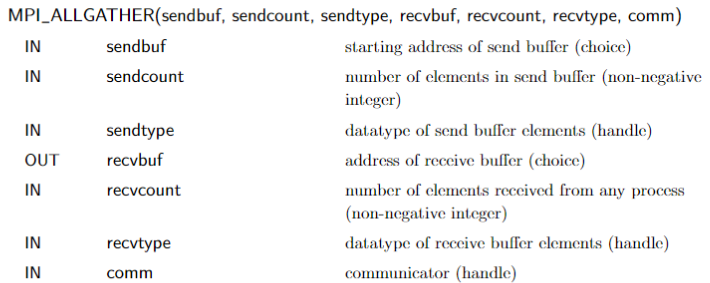

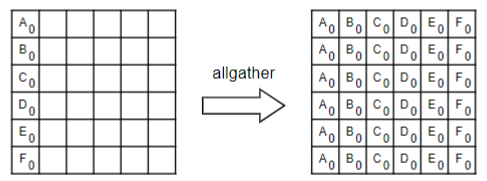

##C

In [ ]:
%%writefile allgather.c
// DESCRIPCION: Ejemplo de uso de MPI_Gather 
//              El proceso ROOT recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo 
#include "mpi.h" 
#include<stdio.h>  
#include<stdlib.h> // malloc 
#define SIZE 4 
int main(  ){  
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, recvcount, i; 
  float sendbuf[SIZE]; 
  float *recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  if(np>=3){ // DEBE CUMPLIRSE QUE SE USEN AL MENOS 3 PROCESOS 
    sendcount = SIZE;  
    recvcount = SIZE; 

    for(i=0;i<SIZE;i++) 
      sendbuf[i]= rank; 

    recvbuf=(float*)malloc(SIZE*np*sizeof(float)); 
    if(recvbuf==NULL){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 

    MPI_Allgather(sendbuf,sendcount,MPI_FLOAT,recvbuf,recvcount, MPI_FLOAT, MPI_COMM_WORLD); 

    //if(rank==1){
      printf("\nSoy el %d, recolecte los valores: ",rank); 
      for(i=0;i<SIZE*np;i++){ 
        if(i%SIZE==0) printf("\n"); 
        printf("%5.1f, ",recvbuf[i]); 
      }       
    //}

    free(recvbuf); 
  }else 
    printf("Debe hacer al menos 3 procesos para que funciones este programa"); 

  MPI_Finalize(); 
  return 0; 
} 

Overwriting allgather.c


In [ ]:
%%script bash
mpicc allgather.c -o allgather
mpirun --allow-run-as-root -np 3 allgather


Soy el 0, recolecte los valores: 
  0.0,   0.0,   0.0,   0.0, 
  1.0,   1.0,   1.0,   1.0, 

Soy el 2, recolecte los valores: 
  0.0,   0.0,   0.0,   0.0, 
  1.0,   1.0,   1.0,   1.0, 

Soy el 1, recolecte los valores: 
  0.0,   0.0,   0.0,   0.0, 
  1.0,   1.0,   1.0,   1.0, 
  2.0,   2.0,   2.0,   2.0,   2.0,   2.0,   2.0,   2.0,   2.0,   2.0,   2.0,   2.0, 

## C++

In [ ]:
%%writefile allgather.cpp
// DESCRIPCION: Ejemplo de uso de MPI_Gather 
//              El proceso ROOT recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo 
#include "mpi.h" 
#include<iostream>  
#include<cstdlib> 
#include<iomanip>
#define SIZE 4 
using namespace std;
int main(  ){  
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, recvcount, i; 
  float sendbuf[SIZE]; 
  float *recvbuf; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 

  if(np>=3){ // DEBE CUMPLIRSE QUE SE USEN AL MENOS 3 PROCESOS 
    sendcount = SIZE;  
    recvcount = SIZE; 

    for(i=0;i<SIZE;i++) 
      sendbuf[i]= rank; 

    recvbuf=new float[SIZE*np]; 
    if(recvbuf==NULL){ 
      cout << "ERROR: Memoria insuficiente"; 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 

    MPI_Allgather(sendbuf,sendcount,MPI_FLOAT,recvbuf,recvcount, MPI_FLOAT, MPI_COMM_WORLD); 

    //if(rank==1){
      cout <<"\nSoy el " << rank << ", recolecte los valores: "; 
      for(i=0;i<SIZE*np;i++){ 
        if(i%SIZE==0) cout << endl; 
        cout << fixed << setprecision(1) << recvbuf[i] << ", "; 
      }       
    //}

    delete[] recvbuf; 
  }else 
    cout << "Debe hacer al menos 3 procesos para que funciones este programa"; 

  MPI_Finalize(); 
  return 0; 
} 

Overwriting allgather.cpp


In [ ]:
%%script bash
mpicxx allgather.cpp -o allgather
mpirun --allow-run-as-root -np 3 allgather


Soy el 0, recolecte los valores: 
0.0, 0.0, 0.0, 0.0, 
1.0, 1.0, 1.0, 1.0, 

Soy el 1, recolecte los valores: 
0.0, 0.0, 0.0, 0.0, 
1.0, 1.0, 1.0, 1.0, 

Soy el 2, recolecte los valores: 
0.0, 0.0, 0.0, 0.0, 
1.0, 1.0, 1.0, 1.0, 
2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 

#MPI_Allgatherv

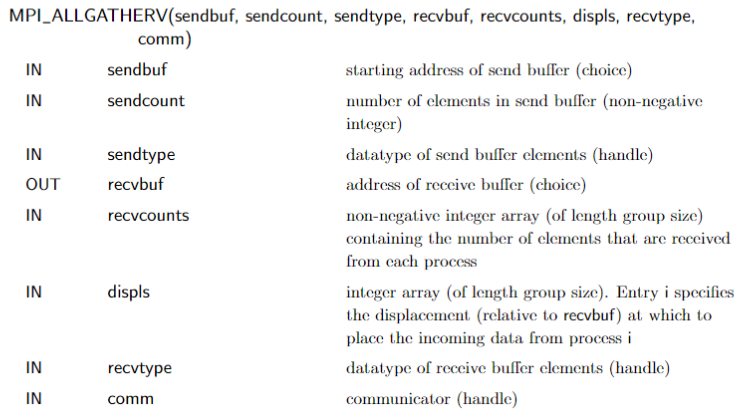

##C

In [ ]:
%%writefile allgatherv.c
// DESCRIPCION: Ejemplo de uso de MPI_Gatherv 
//              Cada proceso recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo (pueden tener longitud distinta) 
#include "mpi.h" 
#include<stdio.h>
#include<stdlib.h> // malloc 
int main(  ){   
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, i, ndatos; 
  float *sendbuf, *recvbuf; 
  int *recvcounts,*displs; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 
  
  sendcount = rank + 1;  
  sendbuf = (float*)malloc(sendcount*sizeof(float)); 
  if( sendbuf == NULL ){ 
    printf("ERROR: Memoria insuficiente"); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  for(i=0;i<sendcount;i++) 
    sendbuf[i]= rank; 
  
  ndatos=(int)(np*(np+1)/2); 
  recvbuf=(float*)malloc(ndatos*sizeof(float)); 
  if(recvbuf==NULL){ 
    printf("ERROR: Memoria insuficiente"); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  recvcounts = (int*)malloc(np*sizeof(int)); 
  if( recvcounts == NULL ){ 
    printf("ERROR: Memoria insuficiente"); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  }     

  MPI_Allgather(&sendcount,1,MPI_INT,recvcounts,1, MPI_INT, MPI_COMM_WORLD); 


  printf("Ejemplo de uso de MPI_Gatherv \n"); 
  printf("\n [%d] recolecte los valores: ",rank); 
  for(i=0;i<np;i++)
    printf("%5d, ",recvcounts[i]);       
  printf("\n"); 
  
  displs = (int*)malloc(np*sizeof(int)); 
  if( displs == NULL ){ 
    printf("ERROR: Memoria insuficiente"); 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  displs[0]=0; 
  for(i=1;i<np;i++) 
    displs[i]=displs[i-1]+recvcounts[i-1]; 

  MPI_Allgatherv(sendbuf, sendcount, MPI_FLOAT, recvbuf, recvcounts, displs, MPI_FLOAT, MPI_COMM_WORLD); 
  
  free(sendbuf); 

  if(rank==1){
    printf("Datos recolectados por el %d\n",rank); 
    for(i=0;i<ndatos;i++) 
      printf("%4.0f, ",recvbuf[i]);       
  }

  free(recvbuf); 
  free(recvcounts); 
  free(displs); 

  MPI_Finalize(); 
  return 0; 
} 

Overwriting allgatherv.c


In [ ]:
%%script bash
mpicc allgatherv.c -o allgatherv
mpirun --allow-run-as-root -np 3 allgatherv

## C++

In [ ]:
%%writefile allgatherv.cpp
// DESCRIPCION: Ejemplo de uso de MPI_Gatherv 
//              Cada proceso recibe en recvbuf los valores que le envia cada proceso (sendbuf),  
//              incluido de sí mismo (pueden tener longitud distinta) 
#include "mpi.h" 
#include<iostream>
#include<cstdlib>  
using namespace std;
int main(  ){   
  MPI_Init(NULL,NULL); 

  int np, rank, sendcount, i, ndatos; 
  float *sendbuf, *recvbuf; 
  int *recvcounts,*displs; 

  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np); 
  
  sendcount = rank + 1;  
  sendbuf = new float[sendcount]; 
  if( sendbuf == NULL ){ 
    cout << "ERROR: Memoria insuficiente"; 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  for(i=0;i<sendcount;i++) 
    sendbuf[i]= rank; 
  
  ndatos=(int)(np*(np+1)/2); 
  recvbuf=new float[ndatos]; 
  if(recvbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente"; 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  recvcounts = new int[np]; 
  if( recvcounts == NULL ){ 
    cout << "ERROR: Memoria insuficiente"; 
    MPI_Abort(MPI_COMM_WORLD,99); 
  }     

  MPI_Allgather(&sendcount,1,MPI_INT,recvcounts,1, MPI_INT, MPI_COMM_WORLD); 


  cout << "Ejemplo de uso de MPI_Gatherv \n"; 
  cout << "\n [" << rank << "] recolecte los valores: "; 
  for(i=0;i<np;i++)
    cout << recvcounts[i] << ", ";       
  cout << endl; 
  
  displs = new int[np]; 
  if( displs == NULL ){ 
    cout << "ERROR: Memoria insuficiente"; 
    MPI_Abort(MPI_COMM_WORLD,99); 
  } 

  displs[0]=0; 
  for(i=1;i<np;i++) 
    displs[i]=displs[i-1]+recvcounts[i-1]; 

  MPI_Allgatherv(sendbuf, sendcount, MPI_FLOAT, recvbuf, recvcounts, displs, MPI_FLOAT, MPI_COMM_WORLD); 
  
  free(sendbuf); 

  if(rank==1){
    cout << "Datos recolectados por el " << rank << endl; 
    for(i=0;i<ndatos;i++) 
      cout << recvbuf[i] << ", ";       
  }

  delete[] recvbuf; 
  delete[] recvcounts; 
  delete[] displs; 

  MPI_Finalize(); 
  return 0; 
} 

In [ ]:
%%script bash
mpicxx allgatherv.cpp -o allgatherv
mpirun --allow-run-as-root -np 3 allgatherv

#Ejemplo distribución de los datos en un archivo

##Generar el archivo 

In [ ]:
%%writefile generador_archivo_datos.c
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
// ---> argv[1]: Nombre del archivo a generar <---
// ---> argv[2]: numero de datos a generar    <---
int main(int argc, char*argv[]){
  FILE *fp;
  int n,*datos, i;
  
  n = atoi(argv[2]);
  fp = fopen(argv[1], "w");
  if(fp){
    srand(time(NULL));
    fprintf(fp,"%d\n",n);
    for(i=0;i<n;i++)
      fprintf(fp,"%d\n",rand()%100);
    
    fclose(fp);
  }
  
	return 0;
}

Writing generador_archivo_datos.c


In [ ]:
%%script bash
gcc generador_archivo_datos.c -o generar
./generar datos.dat 30

## Distribuyendo entre los procesos

### version1
1. Leer el archivo de datos (datos.dat) y distribuirlo entre los procesos (usar scatterv)
2. Hacer que un proceso recolecte los datos que tiene cada proceso y los mande a un archivo (datos2.dat) (usar gatherv)

In [ ]:
%%writefile DistribuyendoDatos1.c
#include <stdlib.h>
#include "mpi.h"
#include <stdio.h>
#include <math.h> // ceil()
#include <limits.h> // INT_MAX 

#define BLOCK_LOW(id,p,n) ((id)*(n)/(p))
#define BLOCK_HIGH(id,p,n) (BLOCK_LOW((id)+1,p,n)-1)
#define BLOCK_SIZE(id,p,n)(BLOCK_HIGH(id,p,n)-BLOCK_LOW(id,p,n)+1)

//  ■■■■■■■■■■
int read_array(char* fname, int **arr) {
  FILE *myFile;
  unsigned int i, n, chunksize, faltantes;

  myFile = fopen(fname, "r");
  if(!myFile){
      printf("ERROR: No se pudo abrir el archivo %s",fname);
      MPI_Abort(MPI_COMM_WORLD, 99);
  }

  fscanf(myFile, "%i\n", &n); // numero de datoss a leer

  *arr = (int *) malloc( n * sizeof(int) );
  if (*arr == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  for ( i=0; i < n; i++)
    fscanf(myFile, "%i\n", (*arr)+i);

  return n;
}

//  ■■■■
int main(int argc, char**argv) {
  int id, np, root;
  unsigned int n, i, n_local, *displs, *sendcounts;
  double start, time;
  int *sendbuf, *recvbuf, *arreglo;

  MPI_Init(&argc, &argv);
  MPI_Comm_size(MPI_COMM_WORLD, &np); // Numero total de procesos
  MPI_Comm_rank(MPI_COMM_WORLD, &id); // Valor de nuestro identificador

  MPI_Barrier(MPI_COMM_WORLD);  // sincronización
  start = MPI_Wtime();

  root = np - 1;
  if (id == root) { // Lee los datos del archivo
    n = read_array(argv[1], &sendbuf);
    printf("\nDatos a distribuir");
    printf("\nsendbuf={");
    for(i=0;i<n;i++)
      printf("%d, ",sendbuf[i]);
    printf("}\n");

    sendcounts = (int*)malloc(np*sizeof(int));
    if (sendcounts == NULL) {
      printf("Memoria insuficiente\n");
      MPI_Abort(MPI_COMM_WORLD, 99);
    }

    printf("\nsendcounts={");    
    for(i=0;i<np;i++){
      sendcounts[i] = BLOCK_SIZE(i,np,n);
      printf("%d, ",sendcounts[i]);
    }
    printf("}\n");
    
    displs = (int*)malloc(np*sizeof(int)); 
    if(displs==NULL){ 
      printf("ERROR: Memoria insuficiente"); 
      MPI_Abort(MPI_COMM_WORLD,99); 
    } 
    displs[0]=0; 
    for(i=1;i<np;i++)
      displs[i]=displs[i-1]+sendcounts[i-1];
  }

  MPI_Bcast(&n, 1, MPI_UNSIGNED, root, MPI_COMM_WORLD);
  n_local = BLOCK_SIZE(id,np,n);

  
  recvbuf = (int *) malloc(n_local*sizeof(int));
  if (recvbuf == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  MPI_Scatterv(sendbuf, sendcounts, displs, MPI_INT, recvbuf, n_local, MPI_INT, root, MPI_COMM_WORLD);

  if (id==1) {
    printf("\n[%d]recvbuf={",id);
    for(i=0;i<n_local;i++)
      printf("%d, ", recvbuf[i]);
    printf("}\n");
  }

  // <--- aqui va el procesamiento local de los datos recibidos en recvbuf


  // inicia la recolección de los datos distribuidos
  if(id==root){
    arreglo = (int *) malloc( n * sizeof(int) );
    if (arreglo == NULL) {
      printf("Memoria insuficiente\n");
      MPI_Abort(MPI_COMM_WORLD, 99);
    }
  }

  MPI_Gatherv(recvbuf, n_local, MPI_INT, arreglo, sendcounts, displs, MPI_INT, root, MPI_COMM_WORLD); 
  if (id == root) { // Lee los datos del archivo
    printf("\nDespués de la recolección");
    printf("\narreglo={");
    for(i=0;i<n;i++)
      printf("%d, ",arreglo[i]);
    printf("}\n");
  }

  free(recvbuf);
  if (id == root) free(sendbuf);

  MPI_Finalize();
  return 0;
}

Writing DistribuyendoDatos1.c


In [ ]:
%%script bash
mpicc DistribuyendoDatos1.c -o DistribuyendoDatos1
mpirun --allow-run-as-root -np 3 DistribuyendoDatos1 datos.dat


Datos a distribuir
sendbuf={92, 61, 29, 14, 40, 76, 81, 89, 72, 52, }

sendcounts={3, 3, 4, }

[1]recvbuf={14, 40, 76, }

Después de la recolección
arreglo={92, 61, 29, 14, 40, 76, 81, 89, 72, 52, }


### version2
Se divide el num de datos en el archivo a partes iguales entre los procesoss, haciendo que 
$chunksize=\left\lceil \frac{n}{np} \right\rceil$

En el caso en que se necesitaran valores para completar la division exacta se completan con *dummys* (pe, INT_MAX)

In [ ]:
%%writefile DistribuyendoDatos2.c
#include <stdlib.h>
#include "mpi.h"
#include <stdio.h>
#include <math.h> // ceil()
#include <limits.h> // INT_MAX 
//  ■■■■■■■■■■
int read_array(char* fname, int **arr, int np) {
  FILE *myFile;
  unsigned int i, n, chunksize, faltantes;

  myFile = fopen(fname, "r");
  if(!myFile){
    printf("ERROR: No se pudo abrir el archivo para lectura %s",fname);
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  fscanf(myFile, "%i\n", &n); // numero de datoss a leer

  chunksize = ceil(n*1.0 / np);
  faltantes = np*chunksize - n;

  *arr = (int *) malloc((chunksize*np)*sizeof(int));
  if (*arr == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  for ( i=0; i < n; i++)
    fscanf(myFile, "%i\n", (*arr)+i);

  for ( i=n; i < n + faltantes; i++) //<--- Dummys
    (*arr)[i] = INT_MAX;

  return n;
}

//  ■■■■
int main(int argc, char**argv) {
  int rank, np, root, faltantes;
  unsigned int n, chunksize, i;
  double start, time;
  int *Arreglo, *S_i;

  MPI_Init(&argc, &argv);

  MPI_Comm_size(MPI_COMM_WORLD, &np); // Numero total de procesos
  MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

  MPI_Barrier(MPI_COMM_WORLD);  // sincronización
  start = MPI_Wtime();

  // Root es el último
  root = np - 1;
  if (rank == root){ // Lee los datos del archivo
    n = read_array(argv[1], &Arreglo, np);
    chunksize = ceil(n*1.0 / np);
    faltantes = np*chunksize - n;    
  }

  // Comunica longitud de los chunks
  MPI_Bcast(&chunksize, 1, MPI_INT, root, MPI_COMM_WORLD);
  
  // Pide memoria del doble de dicha longitud para poder ordenar
  S_i = (int *) malloc(chunksize*sizeof(int));
  if (S_i == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  MPI_Scatter(Arreglo, chunksize, MPI_INT, S_i, chunksize, MPI_INT, root, MPI_COMM_WORLD);

  if (rank==1) {
    for(i=0;i<chunksize;i++)
      printf("%d\t ", S_i[i]);
  }

  // ------aqui va el procesamiento a realizar con los datos






  // ---------------------------------------------------------

  // Recolectar de nuevo los datos en el root e imprimir


  // ---------------------------------------------------------
  free(S_i);
  if (rank == root) free(Arreglo);

  MPI_Finalize();
  return 0;
}

Overwriting DistribuyendoDatos2.c


In [ ]:
%%script bash
mpicc DistribuyendoDatos2.c -o DistribuyendoDatos2 -lm
mpirun --allow-run-as-root -np 3 DistribuyendoDatos2 datos.dat

40	 76	 81	 89	 



---


# Ordenamiento paralelo (Merge-split)
1. Leer el archivo de datos (*datos.dat*) y distriburlo entre los procesos (usar scatter) NOTA: Cada proceso recibe el mismo número de datos
2. Cada proceso ordena localmente sus datos llamando al quicksort
3. Realizar el ordenamienta paralelo
4. Hacer que un proceso recolecte los datos que tiene cada proceso y los mande a un archivo (*datos_ordenados.dat*) (usar gather)


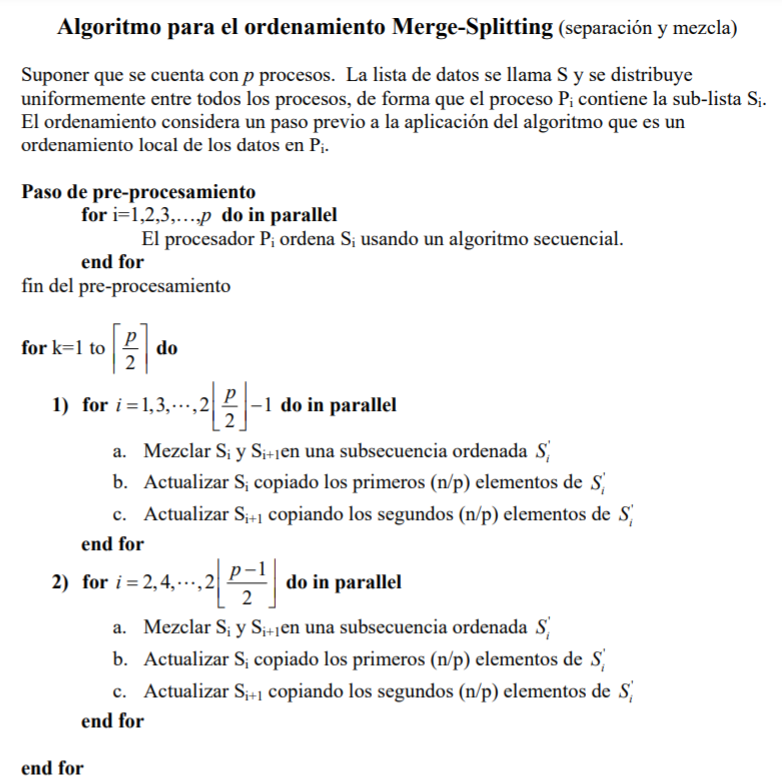
---





In [ ]:
%%writefile Ordenamiento.c
#include <stdlib.h>
#include "mpi.h"
#include <stdio.h>
#include <math.h> // ceil()
#include <limits.h> // INT_MAX 
// 
void mezcla(S_i, 2*chunksize){
    




}
//  ■■■■■■■■■■
int read_array(char* fname, int **arr, int np) {
  FILE *myFile;
  unsigned int i, n, chunksize, faltantes;

  myFile = fopen(fname, "r");
  if(!myFile){
    printf("ERROR: No se pudo abrir el archivo para lectura %s",fname);
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  fscanf(myFile, "%i\n", &n); // numero de datoss a leer

  chunksize = ceil(n*1.0 / np);
  faltantes = np*chunksize - n;

  *arr = (int *) malloc((chunksize*np)*sizeof(int));
  if (*arr == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  for ( i=0; i < n; i++)
    fscanf(myFile, "%i\n", (*arr)+i);

  for ( i=n; i < n + faltantes; i++) //<--- Dummys
    (*arr)[i] = INT_MAX;

  return n;
}

//  ■■■■
int main(int argc, char**argv) {
  int rank, np, root, faltantes;
  unsigned int n, chunksize, i;
  double start, time;
  int *Arreglo, *S_i;

  MPI_Init(&argc, &argv);

  MPI_Comm_size(MPI_COMM_WORLD, &np); // Numero total de procesos
  MPI_Comm_rank(MPI_COMM_WORLD, &rank); // Valor de nuestro identificador

  MPI_Barrier(MPI_COMM_WORLD);  // sincronización
  start = MPI_Wtime();

  // Root es el último
  root = np - 1;

  // <--- toma de tiempo 1
  if (rank == root){ // Lee los datos del archivo
    n = read_array(argv[1], &Arreglo, np);
    chunksize = ceil(n*1.0 / np);
    faltantes = np*chunksize - n;    

    printf("\nArreglo = {");
    for(i=0;i<n;i++)
      printf("%d, ", Arreglo[i]);
    printf("}");

  }
  
  // Comunica longitud de los chunks
  MPI_Bcast(&chunksize, 1, MPI_UNSIGNED, root, MPI_COMM_WORLD);
  
  // Pide memoria del doble de dicha longitud para poder ordenar
  S_i = (int *) malloc(2*chunksize*sizeof(int));
  if (S_i == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  MPI_Scatter(Arreglo, chunksize, MPI_INT, S_i, chunksize, MPI_INT, root, MPI_COMM_WORLD);

  if (rank==0) {
    for(i=0;i<chunksize;i++)
      printf("%d\t ", S_i[i]);
  }

  // ------aqui va el procesamiento a realizar con los datos

  qsort(  S_i, chunksize, &compara );

  for(i=1;i<=ceil(np/2.0);i++){






  }
  // ---------------------------------------------------------

  // Recolectar de nuevo los datos en el root e imprimir
  MPI_Gather(S_i, chunksize, MPI_INT, Arreglo, chunksize, MPI_INT, root, MPI_COMM_WORLD );
  // <--- toma de tiempo 2

  if( rank==root ){
    printf("\nArreglo ordenado = {");
    for(i=0;i<n;i++)
      printf("%d\t",Arreglo[i]);
    printf("}");
  }

  // ---------------------------------------------------------
  free(S_i);
  if (rank == root) free(Arreglo);

  MPI_Finalize();
  return 0;
}

Writing Ordenamiento.c


In [ ]:
%%script bash
mpicc Ordenamiento.c -o Ordenamiento -lm
mpirun --allow-run-as-root -np 5 Ordenamiento datos.dat

--------------------------------------------------------------------------
mpirun was unable to find the specified executable file, and therefore
did not launch the job.  This error was first reported for process
rank 0; it may have occurred for other processes as well.

NOTE: A common cause for this error is misspelling a mpirun command
      line parameter option (remember that mpirun interprets the first
      unrecognized command line token as the executable).

Node:       90baa1150780
Executable: Ordenamiento
--------------------------------------------------------------------------
7 total processes failed to start


Ordenamiento.c:7:18: error: expected ‘)’ before numeric constant
 void mezcla(S_i, 2*chunksize){
                  ^
Ordenamiento.c: In function ‘main’:
Ordenamiento.c:92:28: error: ‘compara’ undeclared (first use in this function)
   qsort(  S_i, chunksize, &compara );
                            ^~~~~~~
Ordenamiento.c:92:28: note: each undeclared identifier is reported only once for each function it appears in
Ordenamiento.c:92:3: error: too few arguments to function ‘qsort’
   qsort(  S_i, chunksize, &compara );
   ^~~~~
In file included from Ordenamiento.c:1:0:
/usr/include/stdlib.h:827:13: note: declared here
 extern void qsort (void *__base, size_t __nmemb, size_t __size,
             ^~~~~
Ordenamiento.c:102:7: warning: implicit declaration of function ‘mezcla’ [-Wimplicit-function-declaration]
       mezcla(S_i, 2*chunksize) // <----
       ^~~~~~
Ordenamiento.c:103:7: error: expected ‘;’ before ‘MPI_Send’
       MPI_Send(S_i+chunksize, chunksize, MPI_INT, rank+1, 10, MPI_COMM_

#MPI_Alltoall

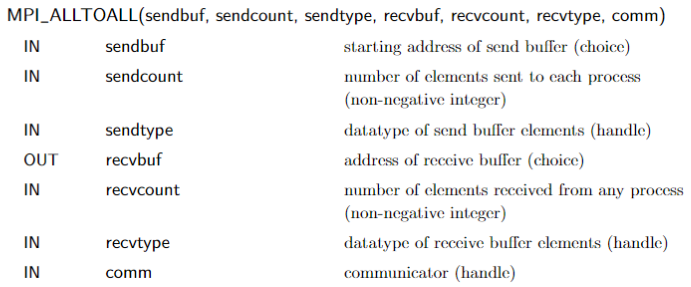

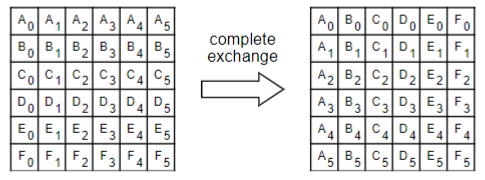

##C

In [ ]:
%%writefile alltoall.c
// DESCRIPCION: Ejemplo del uso de MPI_Alltoall 
//             Cada proceso envía SIZE datos (sendbuf) a los demas procesos, y cada proceso  
//              recibe en recvbuf los valores que le envian los demás,  incluido si mismo 
#include "mpi.h" 
#include<stdio.h>   
#include<stdlib.h> // malloc 
#define SIZE 4 
int main(  ){   
  int np, rank, sendcount, recvcount, i; 
  float *sendbuf; 
  float *recvbuf; 

  MPI_Init(NULL,NULL); 
  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);     

  sendcount = SIZE;  
  recvcount = SIZE;  

  sendbuf=(float*)malloc(SIZE*np*sizeof(float)); 
  if(sendbuf==NULL){ 
    printf("ERROR: Memoria insuficiente!\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }  

  for(i=0;i<SIZE*np;i++) 
    sendbuf[i]= rank;  

  recvbuf=(float*)malloc(SIZE*np*sizeof(float)); 
  if(recvbuf==NULL){ 
    printf("ERROR: Memoria insuficiente!\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  } 

  MPI_Alltoall(sendbuf,SIZE,MPI_FLOAT,recvbuf,SIZE, MPI_FLOAT,MPI_COMM_WORLD);

  if(rank==1){  
    printf("\nSoy el %d, recolecte los valores: ",rank); 
    for(i=0;i<SIZE*np;i++){ 
      if(i%SIZE==0) printf("\n"); 
        printf("%5.1f, ",recvbuf[i]); 
    } 
  } 

  free(recvbuf); 
  free(sendbuf);    

  MPI_Finalize(); 
  return 0; 
} 

Overwriting alltoall.c


In [ ]:
%%writefile alltoall.cpp
// DESCRIPCION: Ejemplo del uso de MPI_Alltoall 
//             Cada proceso envía SIZE datos (sendbuf) a los demas procesos, y cada proceso  
//              recibe en recvbuf los valores que le envian los demás,  incluido si mismo 
#include "mpi.h" 
#include<iostream>   
#include<cstdlib>  
#include<iomanip>
#define SIZE 4 
using namespace std;
int main(  ){   
  int np, rank, sendcount, recvcount, i; 
  float *sendbuf; 
  float *recvbuf; 

  MPI_Init(NULL,NULL); 
  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);     

  sendcount = SIZE;  
  recvcount = SIZE;  

  sendbuf=(float*)malloc(SIZE*np*sizeof(float)); 
  if(sendbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente!\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }  

  for(i=0;i<SIZE*np;i++) 
    sendbuf[i]= rank;  

  recvbuf=(float*)malloc(SIZE*np*sizeof(float)); 
  if(recvbuf==NULL){ 
    cout << "ERROR: Memoria insuficiente!\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  } 

  MPI_Alltoall(sendbuf,SIZE,MPI_FLOAT,recvbuf,SIZE, MPI_FLOAT,MPI_COMM_WORLD);

  if(rank==1){  
    cout << "\nSoy el " << rank << ", recolecte los valores: "; 
    for(i=0;i<SIZE*np;i++){ 
      if(i%SIZE==0) cout << endl; 
      cout << fixed << setprecision(1) << recvbuf[i]<< ", "; 
    } 
  } 

  delete[] recvbuf; 
  delete[] sendbuf;    

  MPI_Finalize(); 
  return 0; 
} 

Overwriting alltoall.cpp


In [ ]:
%%script bash
mpicxx alltoall.cpp -o alltoall
mpirun --allow-run-as-root -np 5 alltoall


Soy el 1, recolecte los valores: 
0.0, 0.0, 0.0, 0.0, 
1.0, 1.0, 1.0, 1.0, 
2.0, 2.0, 2.0, 2.0, 
3.0, 3.0, 3.0, 3.0, 
4.0, 4.0, 4.0, 4.0, 

#MPI_Alltoallv

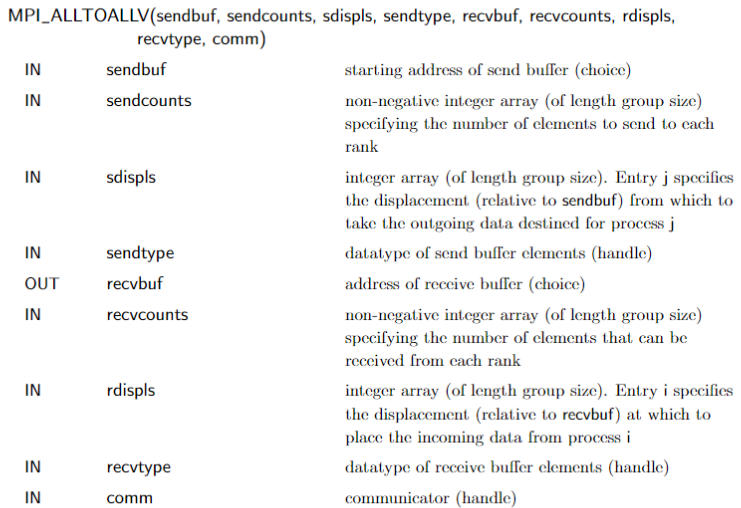

In [ ]:
%%writefile alltoallv.c
// DESCRIPCION: Ejemplo del uso de MPI_Alltoallv 

#include "mpi.h" 
#include<stdio.h>  
#include<stdlib.h> // malloc 
#include<string.h> // strcpy 
void imprimir_1(int id,int arreglo[],int nElems,char*); 
void imprimir_2(int id,float arreglo[],int nElems); 

int main(  ){  
  int np, rank,  i, ndatos_recv, ndatos_send; 
  float *sendbuf, *recvbuf; 
  char msg[40]; 
  int *recvcounts,*sdispls,*rdispls,*sendcounts;  

  MPI_Init(NULL,NULL); 
  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);      

  // ------------------------------------------------------------------- ENVIO 
  sendcounts = (int*)malloc(np*sizeof(int)); 
  if( sendcounts == NULL ){ 
    printf("ERROR: Memoria insuficiente! (sendcounts)\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }    

  ndatos_send = 0; 
  for(i=0;i<np;i++){ 
    sendcounts[i] = rank + 1 + i;  
    ndatos_send += sendcounts[i]; 
  } 


  sendbuf = (float*)malloc(ndatos_send*sizeof(float));
  if( sendbuf == NULL ){ 
    printf("ERROR: Memoria insuficiente! (sendbuf)\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }  

  for(i=0;i<ndatos_send;i++) 
    sendbuf[i]= rank;  

  sdispls = (int*)malloc(np*sizeof(int)); 
  if( sdispls == NULL ){ 
    printf("ERROR: Memoria insuficiente! (sdispls)\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  } 

  sdispls[0]=0; 
  for(i=1;i<np;i++){
    sdispls[i] = sdispls[i-1]+sendcounts[i-1]; 
  }  

  // ------------------------------------------------- RECEPCION 
  recvcounts = (int*)malloc(np*sizeof(int)); 
  if( recvcounts == NULL ){ 
    printf("ERROR: Memoria insuficiente! (recvcounts)\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }      

  // strcpy(msg," enviare este numero de datos ");
  // imprimir_1(rank,sendcounts,np,msg); 
  // if(rank==0) 
  //   printf("\n-----------------------\n");  

  MPI_Alltoall(sendcounts,1,MPI_INT,recvcounts,1,MPI_INT,MPI_COMM_WORLD); 

  // strcpy(msg," recibire este numero de datos "); 
  // imprimir_1(rank,recvcounts,np,msg);   

//  MPI_Barrier(MPI_COMM_WORLD); 
//  if(rank==0) 
  //  printf("\n-----------------------\n");  

  ndatos_recv = 0; 
  for(i=0;i<np;i++)
    ndatos_recv += recvcounts[i]; 
  

  recvbuf = (float*)malloc(ndatos_recv*sizeof(float)); 
  if( recvbuf == NULL ){ 
    printf("ERROR: Memoria insuficiente!\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }  

  rdispls = (int*)malloc(np*sizeof(int)); 
  if( rdispls == NULL ){ 
    printf("ERROR: Memoria insuficiente! (rdispls)\n"); 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  } 

  rdispls[0]=0; 
  for(i=1;i<np;i++) 
    rdispls[i]=rdispls[i-1]+recvcounts[i-1]; 

  MPI_Alltoallv(sendbuf,sendcounts,sdispls,MPI_FLOAT,recvbuf,recvcounts,rdispls,MPI_FLOAT,MPI_COMM_WORLD);      

  // if(rank==0) 
  //  imprimir_2(rank,recvbuf,ndatos_recv); 

  // MPI_Barrier(MPI_COMM_WORLD); 
  if(rank==0) 
    imprimir_2(rank,recvbuf,ndatos_recv);  

  free(sendbuf); 
  free(recvbuf); 
  free(recvcounts); 
  free(sendcounts); 
  free(sdispls); 
  free(rdispls);  

  MPI_Finalize(); 
  return 0; 
}  

void imprimir_1(int id,int arreglo[],int nElems,char* msg){
  int i; 
  printf("\nSoy el %d, %s {",id,msg); 
  for(i=0;i<nElems;i++) 
    printf("%d, ",arreglo[i]); 
  printf("}"); 
} 

void imprimir_2(int id,float arreglo[],int nElems){ 
  int i; 
  printf("\n \nSoy el %d, recibi {",id); 
  for(i=0;i<nElems;i++) 
    printf("%.1f, ",arreglo[i]); 
  printf("}"); 
} 

 

Writing alltoallv.c


In [ ]:
%%script bash
mpicc alltoallv.c -o alltoallv
mpirun --allow-run-as-root -np 4 alltoallv


 
Soy el 0, recibi {0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, }

## C++

In [ ]:
%%writefile alltoallv.cpp
// DESCRIPCION: Ejemplo del uso de MPI_Alltoallv 

#include "mpi.h" 
#include<iostream>  
#include<cstdlib>  
#include<string.h> // strcpy 
void imprimir_1(int id,int arreglo[],int nElems,char*); 
void imprimir_2(int id,float arreglo[],int nElems); 

using namespace std;

int main(  ){  
  int np, rank,  i, ndatos_recv, ndatos_send; 
  float *sendbuf, *recvbuf; 
  char msg[40]; 
  int *recvcounts,*sdispls,*rdispls,*sendcounts;  

  MPI_Init(NULL,NULL); 
  MPI_Comm_rank(MPI_COMM_WORLD, &rank); 
  MPI_Comm_size(MPI_COMM_WORLD, &np);      

  // ------------------------------------------------------------------- ENVIO 
  sendcounts = new int[np]; 
  if( sendcounts == NULL ){ 
    cout << "ERROR: Memoria insuficiente! (sendcounts)\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }    

  ndatos_send = 0; 
  for(i=0;i<np;i++){ 
    sendcounts[i] = rank + 1 + i;  
    ndatos_send += sendcounts[i]; 
  } 


  sendbuf = new float[ndatos_send];
  if( sendbuf == NULL ){ 
    cout << "ERROR: Memoria insuficiente! (sendbuf)\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }  

  for(i=0;i<ndatos_send;i++) 
    sendbuf[i]= rank;  

  sdispls = new int[np]; 
  if( sdispls == NULL ){ 
    cout << "ERROR: Memoria insuficiente! (sdispls)\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  } 

  sdispls[0]=0; 
  for(i=1;i<np;i++){
    sdispls[i] = sdispls[i-1]+sendcounts[i-1]; 
  }  

  // ------------------------------------------------- RECEPCION 
  recvcounts = new int[np]; 
  if( recvcounts == NULL ){ 
    cout << "ERROR: Memoria insuficiente! (recvcounts)\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }      

  // strcpy(msg," enviare este numero de datos ");
  // imprimir_1(rank,sendcounts,np,msg); 
  // if(rank==0) 
  //   printf("\n-----------------------\n");  

  MPI_Alltoall(sendcounts,1,MPI_INT,recvcounts,1,MPI_INT,MPI_COMM_WORLD); 

  // strcpy(msg," recibire este numero de datos "); 
  // imprimir_1(rank,recvcounts,np,msg);   

//  MPI_Barrier(MPI_COMM_WORLD); 
//  if(rank==0) 
  //  printf("\n-----------------------\n");  

  ndatos_recv = 0; 
  for(i=0;i<np;i++)
    ndatos_recv += recvcounts[i]; 
  

  recvbuf = new float[ndatos_recv]; 
  if( recvbuf == NULL ){ 
    cout << "ERROR: Memoria insuficiente!\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  }  

  rdispls = (int*)malloc(np*sizeof(int)); 
  if( rdispls == NULL ){ 
    cout << "ERROR: Memoria insuficiente! (rdispls)\n"; 
    MPI_Abort(MPI_COMM_WORLD, 99); 
  } 

  rdispls[0]=0; 
  for(i=1;i<np;i++) 
    rdispls[i]=rdispls[i-1]+recvcounts[i-1]; 

  MPI_Alltoallv(sendbuf,sendcounts,sdispls,MPI_FLOAT,recvbuf,recvcounts,rdispls,MPI_FLOAT,MPI_COMM_WORLD);      

  // if(rank==0) 
  //  imprimir_2(rank,recvbuf,ndatos_recv); 

  // MPI_Barrier(MPI_COMM_WORLD); 
  if(rank==np-1) 
    imprimir_2(rank,recvbuf,ndatos_recv);  

  delete[] sendbuf; 
  delete[] recvbuf; 
  delete[] recvcounts; 
  delete[] sendcounts; 
  delete[] sdispls; 
  delete[] rdispls;  

  MPI_Finalize(); 
  return 0; 
}  

void imprimir_1(int id,int arreglo[],int nElems,char* msg){
  int i; 
  cout << "\nSoy el " << id << ", " << msg << " {"; 
  for(i=0;i<nElems;i++) 
    cout << arreglo[i] << ", "; 
  cout << "}"; 
} 

void imprimir_2(int id,float arreglo[],int nElems){ 
  int i; 
  cout << "\n \nSoy el " << id << ", recibi {"; 
  for(i=0;i<nElems;i++) 
    cout << arreglo[i] << ", "; 
  cout << "}"; 
} 

 

Overwriting alltoallv.cpp


In [ ]:
%%script bash
mpicxx alltoallv.cpp -o alltoallv
mpirun --allow-run-as-root -np 4 alltoallv


 
Soy el 3, recibi {0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, }

# Ordenamiento Regular Sampling

1. Leer un dataset de un archivo (datos.dat) con n datos. Suponer que se usan p procesos. Un proceso lee los datos del archivo e inicia una dispersión de los datos. Usar la función BLOCK_SIZE() para determinar cuántos elementos enviar a cada proceso.
2. Cada proceso ordena localmente sus datos con QuickSort
3. Cada proceso selecciona los datos que se encuentran en los índices 0, n/p^2, 2n/p^2, 3n/p^2,..., (p-1)n/p^2 como muestras regulares
4. Un proceso recolecta y ordena las muestras regulares y selecciona p-1 valores pivote de la lista ordenada. Los valores pivote están en los índices p+p/2-1, 2p+p/2-1, 3p+p/2-1, ... , (p-1)p+p/2-1. Los valores pivote son dados a conocer a todos los procesos.
5. Cada proceso particiona su sublista ordenada en p piezas disjuntas, usando los valores pivote como separadores.
6. Cada proceso Pi mantiene su iesima partición y envía la j-partición al proceso Pj
7. Cada proceso mezcla sus p particiones en una sola lista. Al final de esta etapa, los elementos están ordenados.
8. Recolectar los elementos que tiene cada proceso en uno solo con fines de impresión (en pantalla o en archivo)

In [ ]:
%%writefile myheader.h
#include <stdlib.h>
#include "mpi.h"
#include <stdio.h>
#include <math.h> // ceil()
#include <limits.h> // INT_MAX 

#define BLOCK_LOW(id,p,n) ((id)*(n)/(p))
#define BLOCK_HIGH(id,p,n) (BLOCK_LOW((id)+1,p,n)-1)
#define BLOCK_SIZE(id,p,n)(BLOCK_HIGH(id,p,n)-BLOCK_LOW(id,p,n)+1)

int compare(const void *_a, const void *_b) { 
  int *a, *b;
  
  a = (int *) _a;
  b = (int *) _b;
  return (*a - *b);
}

//  ■■■■■■■■■■
int read_array(char* fname, int **arr, int np) {
  FILE *myFile;
  unsigned int i, n, chunksize, faltantes;

  myFile = fopen(fname, "r");
  if(!myFile){
    printf("ERROR: No se pudo abrir el archivo %s",fname);
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  fscanf(myFile, "%i\n", &n); // numero de datoss a leer

  *arr = (int *) malloc( n * sizeof(int) );
  if (*arr == NULL) {
    printf("Memoria insuficiente\n");
    MPI_Abort(MPI_COMM_WORLD, 99);
  }

  for ( i=0; i < n; i++)
    fscanf(myFile, "%i\n", (*arr)+i);

  return n;
}

Writing myheader.h


In [ ]:
%%writefile psrs.c
#include "myheader.h"

//  ■■■■
int main(int argc, char**argv) {
  int id, np, root;
  int n, i,j, n_local, *displs, *sendcounts,*recvcounts,*sdispls,*rdispls, ndatos_recv;;
  double start, time;
  int *sendbuf, *recvbuf,  *muestras, *recvbuf_mezclas;
  int *todas_las_muestras, *pivotes;

  MPI_Init(&argc, &argv);
  MPI_Comm_size(MPI_COMM_WORLD, &np); // Numero total de procesos
  MPI_Comm_rank(MPI_COMM_WORLD, &id); // Valor de nuestro identificador

  MPI_Barrier(MPI_COMM_WORLD);  // sincronización
  start = MPI_Wtime();

  // El root lee un dataset del archivo con n datos e inicia una dispersión de los datos.  <-----  (1)
  root = np - 1;
  if (id == root) { // Lee los datos del archivo
    n = read_array(argv[1], &sendbuf, np);
    printf("\nDatos a distribuir"); printf("\nsendbuf={"); for(i=0;i<n;i++) printf("%d, ",sendbuf[i]); printf("}\n");// <---- impresion
  }

  sendcounts = (int*)malloc(np*sizeof(int));
  if (sendcounts == NULL) {printf("Memoria insuficiente (sendcounts) \n");MPI_Abort(MPI_COMM_WORLD, 99);}

  if(id==root){
    for(i=0;i<np;i++)
      sendcounts[i] = BLOCK_SIZE(i,np,n); 
    
    printf("\n[%d] sendcounts={",id);  for(i=0;i<np;i++) printf("%d, ", sendcounts[i]); printf("}\n"); // <---- impresion

    displs = (int*)malloc(np*sizeof(int)); 
    if(displs==NULL){ printf("ERROR: Memoria insuficiente (displs)"); MPI_Abort(MPI_COMM_WORLD,99); } 
    displs[0]=0; 
    for(i=1;i<np;i++)
      displs[i] = displs[i-1]+sendcounts[i-1];
  }

  // Comunica longitud de los chunks
  MPI_Bcast(&n, 1, MPI_INT, root, MPI_COMM_WORLD); 
  n_local = BLOCK_SIZE(id,np,n);
  
  recvbuf = (int *) malloc(n_local*sizeof(int));
  if (recvbuf == NULL) {printf("Memoria insuficiente (recvbuf)\n");MPI_Abort(MPI_COMM_WORLD, 99);}

  MPI_Scatterv(sendbuf, sendcounts, displs, MPI_INT, recvbuf, n_local, MPI_INT, root, MPI_COMM_WORLD);

  //if (id==0) { printf("\n[%d]recvbuf={",id); for(i=0;i<n_local;i++) printf("%d, ", recvbuf[i]); printf("}\n");}// <---- impresion
  
  // Cada proceso ordena localmente sus datos con QuickSort  <-----  (2)
  qsort(recvbuf, n_local, sizeof(int), &compare);

  if (id==2) { printf("\n[%d] ordenado recvbuf={",id);  for(i=0;i<n_local;i++) printf("%d, ", recvbuf[i]); printf("}\n"); }// <---- impresion

  // Cada proceso selecciona los n índices 0, n/p^2, 2n/p^2, 3n/p^2,..., (p-1)n/p^2 como muestras regulares <-----  (3)
  muestras = (int*)malloc(np*sizeof(int));
  if (muestras == NULL) {printf("Memoria insuficiente (muestras)\n");MPI_Abort(MPI_COMM_WORLD, 99);}

  for(i=0;i<np;i++)
    muestras[i] = recvbuf[ i*n/(np*np) ];

  // if (id==0) { printf("\n[%d] muestras={",id);  for(i=0;i<np;i++) printf("%d, ", muestras[i]); printf("}\n"); }// <---- impresion

  // Un proceso recolecta y ordena las muestras regulares y selecciona p-1 valores pivote de la lista ordenada. <-----  (4)
  // Los valores pivote están en los índices p+p/2-1, 2p+p/2-1, 3p+p/2-1, ... , (p-1)p+p/2-1.   
  // Los valores pivote son dados a conocer a todos los procesos.

  if(id==root){
    todas_las_muestras = (int*)malloc(   np*np*sizeof(int) );
    if (todas_las_muestras == NULL) {printf("Memoria insuficiente (todas_las_muestras)\n");MPI_Abort(MPI_COMM_WORLD, 99);}
  }

  MPI_Gather( muestras, np, MPI_INT, todas_las_muestras, np, MPI_INT, root, MPI_COMM_WORLD );

  if(id==root){
    qsort( todas_las_muestras, np*np, sizeof(int), &compare );

  //  printf("\n[%d] todas_las_muestras={",id);  for(i=0;i<np*np;i++) printf("%d, ", todas_las_muestras[i]); printf("}\n"); // <---- impresion
  }
  pivotes = (int*)malloc( (np-1)*sizeof(int)   );
  if (pivotes == NULL) {printf("Memoria insuficiente (pivotes) \n");MPI_Abort(MPI_COMM_WORLD, 99);}

  if(id==root){
    for(i=0;i<np-1;i++)
      pivotes[i] = todas_las_muestras[ (i+1)*np + np/2 -1 ];    
  }

  if (id==root) { printf("\n[%d] pivotes={",id);  for(i=0;i<np-1;i++) printf("%d, ", pivotes[i]); printf("}\n"); }// <---- impresion

  MPI_Bcast(pivotes, np-1, MPI_INT, root, MPI_COMM_WORLD);


  // Cada proceso particiona su sublista ordenada en p piezas disjuntas, usando los valores pivote como separadores. <----- (5)
  j=0; 
  for(i=0;i<(np-1);i++){
    sendcounts[i]=0;
    while(recvbuf[j]<=pivotes[i] && j<n_local ){
      sendcounts[i]++;
      j++;
    }
  }
  sendcounts[np-1]=0;
  while( j < n_local ){
    sendcounts[np-1]++;
    j++;
  }
  //if(id==0){ printf("\n[%d] sendcounts={",id);  for(i=0;i<np;i++) printf("%d, ", sendcounts[i]); printf("}\n"); } // <---- impresion
  sdispls = (int*)malloc( np*sizeof(int) );
  if (sdispls == NULL) {printf("Memoria insuficiente (sdispls) \n");MPI_Abort(MPI_COMM_WORLD, 99);}

  sdispls[0]=0;
  for(i=1;i<np;i++)
    sdispls[i] = sdispls[i-1]+sendcounts[i-1];
  //if(id==0){ printf("\n[%d] sdispls={",id);  for(i=0;i<np;i++) printf("%d, ", sdispls[i]); printf("}\n"); } // <---- impresion

  recvcounts =  (int*)malloc( np*sizeof(int) );
  if (recvcounts == NULL) {printf("Memoria insuficiente (recvcounts) \n");MPI_Abort(MPI_COMM_WORLD, 99);}

  MPI_Alltoall( sendcounts, 1, MPI_INT, recvcounts, 1, MPI_INT, MPI_COMM_WORLD );

  rdispls = (int*)malloc( np*sizeof(int) );
  if (rdispls == NULL) {printf("Memoria insuficiente (rdispls) \n");MPI_Abort(MPI_COMM_WORLD, 99);}

  rdispls[0]=0;
  for(i=1;i<np;i++)
    rdispls[i] = rdispls[i-1]+recvcounts[i-1];
 // if(id==0){ printf("\n[%d] rdispls={",id);  for(i=0;i<np;i++) printf("%d, ", rdispls[i]); printf("}\n"); } // <---- impresion

  
  ndatos_recv =0;
  for(i=0;i<np;i++)
    ndatos_recv += recvcounts[i];

  recvbuf_mezclas = (int*)malloc( ndatos_recv *sizeof(int) );
  if (recvbuf_mezclas == NULL) {printf("Memoria insuficiente (recvbuf_mezclas) \n");MPI_Abort(MPI_COMM_WORLD, 99);} 

  // Cada proceso Pi mantiene su iesima partición y envía la j-partición al proceso Pj (alltoallv)  <----- (6) 
  MPI_Alltoallv( recvbuf, sendcounts, sdispls, MPI_INT, recvbuf_mezclas, recvcounts, rdispls, MPI_INT, MPI_COMM_WORLD );

  if(id==0){ printf("\n[%d] recvbuf_mezclas={",id);  for(i=0;i<ndatos_recv;i++) printf("%d, ", recvbuf_mezclas[i]); printf("}\n"); } // <---- impresion

  // Cada proceso mezcla sus p particiones para obtener una sola lista.  <----- (7)


  






  // Recolectar los elementos que tiene cada proceso en un solo proceso con fines de impresión <---- (8)

  MPI_Gather(&ndatos_recv, 1, MPI_INT, recvcounts, 1,MPI_INT, root, MPI_COMM_WORLD);
  if(id==root){
    rdispls[0]=0;
    for(i=1;i<np;i++)  
      rdispls[i]= rdispls[i-1] + recvcounts[i-1];
  }

  MPI_Gatherv( recvbuf_mezclas, ndatos_recv, MPI_INT, sendbuf, recvcounts, rdispls, MPI_INT, root, MPI_COMM_WORLD );

  time = MPI_Wtime() -start;


  if(id==root){ printf("\nDatos ordenados = {");  for(i=0;i<n;i++) printf("%d, ", sendbuf[i]); printf("}\n"); } // <---- impresion

  // Liberar memoria
  if(id==root){
    free(sendcounts);
    free(displs);
    free(todas_las_muestras);
  }
  free(recvbuf);
  free(muestras);
  free(pivotes);

  MPI_Finalize();
  return 0;
}

Writing psrs.c


In [ ]:
%%script bash
mpicc psrs.c -o psrs -lm
mpiexec --allow-run-as-root -np 3 psrs datos.dat